In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pdb
from scipy.optimize import minimize
from scipy.stats import multivariate_normal
from tqdm.notebook import tqdm
import random
import pandas as pd
from scipy.io import savemat
import scipy

In [2]:
"""
Analysis for long context experiments. 
"""
def analysis2(csv_test,csv_data):
    n_tones = 3
    n_trials = csv_data.shape[0]-47

    """
    Get tones and values of keys pressed
    """
    test_columns = list(csv_test.columns)
    test_tones_name = test_columns.index('Name')
    test_tones_col_idx = test_columns.index('Tones')
    df_names = (csv_test.iloc[0:600,test_tones_name]).values
    df_tones = (csv_test.iloc[0:600,test_tones_col_idx]).values

    tones_array_orig = np.zeros((n_trials,n_tones))
    tones_array_idxs_keep = []

    for i_wav in range(603):
        if isinstance(csv_data['Name'][i_wav+46],str):
            tones_array_orig[i_wav,:] = np.array(df_tones[np.where(csv_data['Name'][i_wav+46]\
                                                              ==df_names)[0]][0][1:-1].split(',')).astype(float)  
            tones_array_idxs_keep += [i_wav]


    df_tones = np.copy(tones_array_orig[tones_array_idxs_keep,:])
    df_corrans = np.copy(csv_data['corrAns'][46:csv_data.shape[0]])[tones_array_idxs_keep]
    df_keys = np.copy(csv_data['test_resp.keys'][46:csv_data.shape[0]])[tones_array_idxs_keep]
    
    """
    Find no response cases in the expt
    """
    no_response = np.intersect1d(np.where(df_keys!='h')[0],np.where(df_keys!='l')[0])
    print("Did not respond to: ",no_response)

    """
    Convert keys ['l','h'] to [0,1] and plot p(H|T)
    """
    corrans_num_orig = np.zeros_like(df_corrans)
    corrans_num_orig[df_corrans == 'h'] = 1

    keys_num_orig = np.zeros_like(df_keys)
    keys_num_orig[df_keys == 'h'] = 1

    corrans_num = corrans_num_orig[:600]
    keys_num = keys_num_orig[:600]
    tones_array = df_tones[:600]

    trial_tones = np.repeat(tones_array,1,axis = 0)
    trial_behaviour = np.reshape(keys_num,np.prod(keys_num.shape)) 

    return trial_tones, trial_behaviour

In [3]:
"""
Analysis for long context experiments. 
"""
def analysis3(csv_test,csv_data):
    n_tones = 3
    n_trials = csv_data.shape[0]-47

    """
    Get tones and values of keys pressed
    """
    test_columns = list(csv_test.columns)
    test_tones_name = test_columns.index('Name')
    test_tones_col_idx = test_columns.index('Tones')
    df_names = (csv_test.iloc[0:800,test_tones_name]).values
    df_tones = (csv_test.iloc[0:800,test_tones_col_idx]).values

    tones_array_orig = np.zeros((n_trials,n_tones))
    tones_array_idxs_keep = []

    for i_wav in range(804):
        if isinstance(csv_data['Name'][i_wav+46],str):
            tones_array_orig[i_wav,:] = np.array(df_tones[np.where(csv_data['Name'][i_wav+46]\
                                                              ==df_names)[0]][0][1:-1].split(',')).astype(float)  
            tones_array_idxs_keep += [i_wav]

    df_tones = np.copy(tones_array_orig[tones_array_idxs_keep,:])
    df_corrans = np.copy(csv_data['corrAns'][46:csv_data.shape[0]])[tones_array_idxs_keep]
    df_keys = np.copy(csv_data['test_resp.keys'][46:csv_data.shape[0]])[tones_array_idxs_keep]
    
    """
    Find no response cases in the expt
    """
    no_response = np.intersect1d(np.where(df_keys!='h')[0],np.where(df_keys!='l')[0])
    print("Did not respond to: ",no_response)

    """
    Convert keys ['l','h'] to [0,1] and plot p(H|T)
    """
    corrans_num_orig = np.zeros_like(df_corrans)
    corrans_num_orig[df_corrans == 'h'] = 1

    keys_num_orig = np.zeros_like(df_keys)
    keys_num_orig[df_keys == 'h'] = 1

    corrans_num = corrans_num_orig[:800]
    keys_num = keys_num_orig[:800]
    tones_array = df_tones[:800]

    trial_tones = np.repeat(tones_array,1,axis = 0)
    trial_behaviour = np.reshape(keys_num,np.prod(keys_num.shape)) 

    return trial_tones, trial_behaviour

In [ ]:

csv_test = pd.read_csv('../auditory_categorization_prolific/important_things_not_included_in_assets/allTrials.csv')
csv_data = pd.read_csv('auditory_categorization_prolific_online_data/human_auditory_categorization_91686_2021-03-03_04h34.17_b73c4368-7bd9-11eb-a333-ac1f6b405aea/5ea1f4fa7a70090fd0715b34_categorization_task_2021-03-01_18h06.17.396.csv');

trial_tones_5b34, trial_behaviour_5b34 = analysis2(csv_test,csv_data)

unique_tones = np.unique(trial_tones_5b34)
tone1_prob_behaviour = np.zeros((len(unique_tones)))
tone2_prob_behaviour = np.zeros((len(unique_tones)))
tone3_prob_behaviour = np.zeros((len(unique_tones)))

for i_tone in range(len(unique_tones)):
    tone1_prob_behaviour[i_tone] = np.mean(trial_behaviour_5b34[trial_tones_5b34[:,0]\
                                                       ==unique_tones[i_tone]])
    tone2_prob_behaviour[i_tone] = np.mean(trial_behaviour_5b34[trial_tones_5b34[:,1]\
                                                       ==unique_tones[i_tone]])
    tone3_prob_behaviour[i_tone] = np.mean(trial_behaviour_5b34[trial_tones_5b34[:,2]\
                                                       ==unique_tones[i_tone]])
mean_5b34 = np.mean([tone1_prob_behaviour,tone2_prob_behaviour,tone3_prob_behaviour],axis=0)
std_5b34 = np.std([tone1_prob_behaviour,tone2_prob_behaviour,tone3_prob_behaviour],axis=0)

csv_test = pd.read_csv('../auditory_categorization_prolific/important_things_not_included_in_assets/allTrials.csv')
csv_data = pd.read_csv('auditory_categorization_prolific_online_data/human_auditory_categorization_91686_2021-03-03_04h34.17_b73c4368-7bd9-11eb-a333-ac1f6b405aea/5fad0bb914cb0035f917d619_categorization_task_2021-03-01_17h13.10.896.csv');

trial_tones_d619, trial_behaviour_d619 = analysis2(csv_test,csv_data)

unique_tones = np.unique(trial_tones_d619)
tone1_prob_behaviour = np.zeros((len(unique_tones)))
tone2_prob_behaviour = np.zeros((len(unique_tones)))
tone3_prob_behaviour = np.zeros((len(unique_tones)))

for i_tone in range(len(unique_tones)):
    tone1_prob_behaviour[i_tone] = np.mean(trial_behaviour_d619[trial_tones_d619[:,0]\
                                                       ==unique_tones[i_tone]])
    tone2_prob_behaviour[i_tone] = np.mean(trial_behaviour_d619[trial_tones_d619[:,1]\
                                                       ==unique_tones[i_tone]])
    tone3_prob_behaviour[i_tone] = np.mean(trial_behaviour_d619[trial_tones_d619[:,2]\
                                                       ==unique_tones[i_tone]])
mean_d619 = np.mean([tone1_prob_behaviour,tone2_prob_behaviour,tone3_prob_behaviour],axis=0)
std_d619 = np.std([tone1_prob_behaviour,tone2_prob_behaviour,tone3_prob_behaviour],axis=0)

csv_test = pd.read_csv('../auditory_categorization_prolific/important_things_not_included_in_assets/allTrials.csv')
csv_data = pd.read_csv('auditory_categorization_prolific_online_data/human_auditory_categorization_91686_2021-03-03_04h34.17_b73c4368-7bd9-11eb-a333-ac1f6b405aea/5cc86a4e264a60000124c2e0_categorization_task_2021-03-01_18h07.47.350.csv');

trial_tones_c2e0, trial_behaviour_c2e0 = analysis2(csv_test,csv_data)

unique_tones = np.unique(trial_tones_c2e0)
tone1_prob_behaviour = np.zeros((len(unique_tones)))
tone2_prob_behaviour = np.zeros((len(unique_tones)))
tone3_prob_behaviour = np.zeros((len(unique_tones)))

for i_tone in range(len(unique_tones)):
    tone1_prob_behaviour[i_tone] = np.mean(trial_behaviour_c2e0[trial_tones_c2e0[:,0]\
                                                       ==unique_tones[i_tone]])
    tone2_prob_behaviour[i_tone] = np.mean(trial_behaviour_c2e0[trial_tones_c2e0[:,1]\
                                                       ==unique_tones[i_tone]])
    tone3_prob_behaviour[i_tone] = np.mean(trial_behaviour_c2e0[trial_tones_c2e0[:,2]\
                                                       ==unique_tones[i_tone]])
mean_c2e0 = np.mean([tone1_prob_behaviour,tone2_prob_behaviour,tone3_prob_behaviour],axis=0)
std_c2e0 = np.std([tone1_prob_behaviour,tone2_prob_behaviour,tone3_prob_behaviour],axis=0)

csv_test = pd.read_csv('../auditory_categorization_prolific/important_things_not_included_in_assets/allTrials.csv')
csv_data = pd.read_csv('auditory_categorization_prolific_online_data/human_auditory_categorization_91686_2021-03-03_04h34.17_b73c4368-7bd9-11eb-a333-ac1f6b405aea/5f3990fea9ef865370ac735a_categorization_task_2021-03-01_17h41.13.928.csv');

trial_tones_735a, trial_behaviour_735a = analysis2(csv_test,csv_data)

unique_tones = np.unique(trial_tones_735a)
tone1_prob_behaviour = np.zeros((len(unique_tones)))
tone2_prob_behaviour = np.zeros((len(unique_tones)))
tone3_prob_behaviour = np.zeros((len(unique_tones)))

for i_tone in range(len(unique_tones)):
    tone1_prob_behaviour[i_tone] = np.mean(trial_behaviour_735a[trial_tones_735a[:,0]\
                                                       ==unique_tones[i_tone]])
    tone2_prob_behaviour[i_tone] = np.mean(trial_behaviour_735a[trial_tones_735a[:,1]\
                                                       ==unique_tones[i_tone]])
    tone3_prob_behaviour[i_tone] = np.mean(trial_behaviour_735a[trial_tones_735a[:,2]\
                                                       ==unique_tones[i_tone]])
mean_735a = np.mean([tone1_prob_behaviour,tone2_prob_behaviour,tone3_prob_behaviour],axis=0)
std_735a = np.std([tone1_prob_behaviour,tone2_prob_behaviour,tone3_prob_behaviour],axis=0)

csv_test = pd.read_csv('../auditory_categorization_prolific/important_things_not_included_in_assets/allTrials.csv')
csv_data = pd.read_csv('auditory_categorization_prolific_online_data/human_auditory_categorization_91686_2021-03-03_04h34.17_b73c4368-7bd9-11eb-a333-ac1f6b405aea/5f3801b18c88962be7831304_categorization_task_2021-03-01_19h52.16.006.csv');

trial_tones_1304, trial_behaviour_1304 = analysis2(csv_test,csv_data)

unique_tones = np.unique(trial_tones_1304)
tone1_prob_behaviour = np.zeros((len(unique_tones)))
tone2_prob_behaviour = np.zeros((len(unique_tones)))
tone3_prob_behaviour = np.zeros((len(unique_tones)))

for i_tone in range(len(unique_tones)):
    tone1_prob_behaviour[i_tone] = np.mean(trial_behaviour_1304[trial_tones_1304[:,0]\
                                                       ==unique_tones[i_tone]])
    tone2_prob_behaviour[i_tone] = np.mean(trial_behaviour_1304[trial_tones_1304[:,1]\
                                                       ==unique_tones[i_tone]])
    tone3_prob_behaviour[i_tone] = np.mean(trial_behaviour_1304[trial_tones_1304[:,2]\
                                                       ==unique_tones[i_tone]])
mean_1304 = np.mean([tone1_prob_behaviour,tone2_prob_behaviour,tone3_prob_behaviour],axis=0)
std_1304 = np.std([tone1_prob_behaviour,tone2_prob_behaviour,tone3_prob_behaviour],axis=0)

csv_test = pd.read_csv('../auditory_categorization_prolific/important_things_not_included_in_assets/allTrials.csv')
csv_data = pd.read_csv('auditory_categorization_prolific_online_data/human_auditory_categorization_91686_2021-03-03_04h34.17_b73c4368-7bd9-11eb-a333-ac1f6b405aea/60143ceed282ae3ceda28de3_categorization_task_2021-03-01_18h53.15.963.csv');

trial_tones_8de3, trial_behaviour_8de3 = analysis2(csv_test,csv_data)

unique_tones = np.unique(trial_tones_8de3)
tone1_prob_behaviour = np.zeros((len(unique_tones)))
tone2_prob_behaviour = np.zeros((len(unique_tones)))
tone3_prob_behaviour = np.zeros((len(unique_tones)))

for i_tone in range(len(unique_tones)):
    tone1_prob_behaviour[i_tone] = np.mean(trial_behaviour_8de3[trial_tones_8de3[:,0]\
                                                       ==unique_tones[i_tone]])
    tone2_prob_behaviour[i_tone] = np.mean(trial_behaviour_8de3[trial_tones_8de3[:,1]\
                                                       ==unique_tones[i_tone]])
    tone3_prob_behaviour[i_tone] = np.mean(trial_behaviour_8de3[trial_tones_8de3[:,2]\
                                                       ==unique_tones[i_tone]])
mean_8de3 = np.mean([tone1_prob_behaviour,tone2_prob_behaviour,tone3_prob_behaviour],axis=0)
std_8de3 = np.std([tone1_prob_behaviour,tone2_prob_behaviour,tone3_prob_behaviour],axis=0)

csv_test = pd.read_csv('../auditory_categorization_prolific/important_things_not_included_in_assets/allTrials.csv')
csv_data = pd.read_csv('auditory_categorization_prolific_online_data/human_auditory_categorization_91686_2021-03-03_04h34.17_b73c4368-7bd9-11eb-a333-ac1f6b405aea/5ec48aac33b93f000ab96b7f_categorization_task_2021-03-01_20h56.07.985.csv');

trial_tones_6b7f, trial_behaviour_6b7f = analysis2(csv_test,csv_data)

unique_tones = np.unique(trial_tones_6b7f)
tone1_prob_behaviour = np.zeros((len(unique_tones)))
tone2_prob_behaviour = np.zeros((len(unique_tones)))
tone3_prob_behaviour = np.zeros((len(unique_tones)))

for i_tone in range(len(unique_tones)):
    tone1_prob_behaviour[i_tone] = np.mean(trial_behaviour_6b7f[trial_tones_6b7f[:,0]\
                                                       ==unique_tones[i_tone]])
    tone2_prob_behaviour[i_tone] = np.mean(trial_behaviour_6b7f[trial_tones_6b7f[:,1]\
                                                       ==unique_tones[i_tone]])
    tone3_prob_behaviour[i_tone] = np.mean(trial_behaviour_6b7f[trial_tones_6b7f[:,2]\
                                                       ==unique_tones[i_tone]])
mean_6b7f = np.mean([tone1_prob_behaviour,tone2_prob_behaviour,tone3_prob_behaviour],axis=0)
std_6b7f = np.std([tone1_prob_behaviour,tone2_prob_behaviour,tone3_prob_behaviour],axis=0)

csv_test = pd.read_csv('../auditory_categorization_prolific/important_things_not_included_in_assets/allTrials.csv')
csv_data = pd.read_csv('auditory_categorization_prolific_online_data/human_auditory_categorization_91686_2021-03-03_04h34.17_b73c4368-7bd9-11eb-a333-ac1f6b405aea/5ec3a28f46bca2016fc91c3f_categorization_task_2021-03-01_21h03.59.423.csv');

trial_tones_1c3f, trial_behaviour_1c3f = analysis2(csv_test,csv_data)

unique_tones = np.unique(trial_tones_1c3f)
tone1_prob_behaviour = np.zeros((len(unique_tones)))
tone2_prob_behaviour = np.zeros((len(unique_tones)))
tone3_prob_behaviour = np.zeros((len(unique_tones)))

for i_tone in range(len(unique_tones)):
    tone1_prob_behaviour[i_tone] = np.mean(trial_behaviour_1c3f[trial_tones_1c3f[:,0]\
                                                       ==unique_tones[i_tone]])
    tone2_prob_behaviour[i_tone] = np.mean(trial_behaviour_1c3f[trial_tones_1c3f[:,1]\
                                                       ==unique_tones[i_tone]])
    tone3_prob_behaviour[i_tone] = np.mean(trial_behaviour_1c3f[trial_tones_1c3f[:,2]\
                                                       ==unique_tones[i_tone]])
mean_1c3f = np.mean([tone1_prob_behaviour,tone2_prob_behaviour,tone3_prob_behaviour],axis=0)
std_1c3f = np.std([tone1_prob_behaviour,tone2_prob_behaviour,tone3_prob_behaviour],axis=0)

csv_test = pd.read_csv('../auditory_categorization_prolific/important_things_not_included_in_assets/allTrials.csv')
csv_data = pd.read_csv('auditory_categorization_prolific_online_data/human_auditory_categorization_91686_2021-03-03_04h34.17_b73c4368-7bd9-11eb-a333-ac1f6b405aea/5ec3a1fe1bfa1720b3731604_categorization_task_2021-03-01_21h58.03.550.csv');

trial_tones_1604, trial_behaviour_1604 = analysis2(csv_test,csv_data)

unique_tones = np.unique(trial_tones_1604)
tone1_prob_behaviour = np.zeros((len(unique_tones)))
tone2_prob_behaviour = np.zeros((len(unique_tones)))
tone3_prob_behaviour = np.zeros((len(unique_tones)))

for i_tone in range(len(unique_tones)):
    tone1_prob_behaviour[i_tone] = np.mean(trial_behaviour_1604[trial_tones_1604[:,0]\
                                                       ==unique_tones[i_tone]])
    tone2_prob_behaviour[i_tone] = np.mean(trial_behaviour_1604[trial_tones_1604[:,1]\
                                                       ==unique_tones[i_tone]])
    tone3_prob_behaviour[i_tone] = np.mean(trial_behaviour_1604[trial_tones_1604[:,2]\
                                                       ==unique_tones[i_tone]])
mean_1604 = np.mean([tone1_prob_behaviour,tone2_prob_behaviour,tone3_prob_behaviour],axis=0)
std_1604 = np.std([tone1_prob_behaviour,tone2_prob_behaviour,tone3_prob_behaviour],axis=0)

csv_test = pd.read_csv('../auditory_categorization_prolific/important_things_not_included_in_assets/allTrials.csv')
csv_data = pd.read_csv('auditory_categorization_prolific_online_data/human_auditory_categorization_91686_2021-03-03_04h34.17_b73c4368-7bd9-11eb-a333-ac1f6b405aea/5f14e794a89ac35a3f89801d_categorization_task_2021-02-19_23h35.01.131.csv');

trial_tones_801d, trial_behaviour_801d = analysis2(csv_test,csv_data)

unique_tones = np.unique(trial_tones_801d)
tone1_prob_behaviour = np.zeros((len(unique_tones)))
tone2_prob_behaviour = np.zeros((len(unique_tones)))
tone3_prob_behaviour = np.zeros((len(unique_tones)))

for i_tone in range(len(unique_tones)):
    tone1_prob_behaviour[i_tone] = np.mean(trial_behaviour_801d[trial_tones_801d[:,0]\
                                                       ==unique_tones[i_tone]])
    tone2_prob_behaviour[i_tone] = np.mean(trial_behaviour_801d[trial_tones_801d[:,1]\
                                                       ==unique_tones[i_tone]])
    tone3_prob_behaviour[i_tone] = np.mean(trial_behaviour_801d[trial_tones_801d[:,2]\
                                                       ==unique_tones[i_tone]])
mean_801d = np.mean([tone1_prob_behaviour,tone2_prob_behaviour,tone3_prob_behaviour],axis=0)
std_801d = np.std([tone1_prob_behaviour,tone2_prob_behaviour,tone3_prob_behaviour],axis=0)

csv_test = pd.read_csv('../auditory_categorization_prolific/important_things_not_included_in_assets/allTrials.csv')
csv_data = pd.read_csv('auditory_categorization_prolific_online_data/human_auditory_categorization_91686_2021-03-03_04h34.17_b73c4368-7bd9-11eb-a333-ac1f6b405aea/5f4b1ba295b8186ec4901396_categorization_task_2021-02-19_18h32.43.841.csv');

trial_tones_1396, trial_behaviour_1396 = analysis2(csv_test,csv_data)

unique_tones = np.unique(trial_tones_1396)
tone1_prob_behaviour = np.zeros((len(unique_tones)))
tone2_prob_behaviour = np.zeros((len(unique_tones)))
tone3_prob_behaviour = np.zeros((len(unique_tones)))

for i_tone in range(len(unique_tones)):
    tone1_prob_behaviour[i_tone] = np.mean(trial_behaviour_1396[trial_tones_1396[:,0]\
                                                       ==unique_tones[i_tone]])
    tone2_prob_behaviour[i_tone] = np.mean(trial_behaviour_1396[trial_tones_1396[:,1]\
                                                       ==unique_tones[i_tone]])
    tone3_prob_behaviour[i_tone] = np.mean(trial_behaviour_1396[trial_tones_1396[:,2]\
                                                       ==unique_tones[i_tone]])
mean_1396 = np.mean([tone1_prob_behaviour,tone2_prob_behaviour,tone3_prob_behaviour],axis=0)
std_1396 = np.std([tone1_prob_behaviour,tone2_prob_behaviour,tone3_prob_behaviour],axis=0)

csv_test = pd.read_csv('../auditory_categorization_prolific/important_things_not_included_in_assets/allTrials.csv')
csv_data = pd.read_csv('auditory_categorization_prolific_online_data/human_auditory_categorization_91686_2021-03-03_04h34.17_b73c4368-7bd9-11eb-a333-ac1f6b405aea/5f567ed454a3b50b805354db_categorization_task_2021-02-19_22h29.09.897.csv');

trial_tones_54db, trial_behaviour_54db = analysis2(csv_test,csv_data)

unique_tones = np.unique(trial_tones_54db)
tone1_prob_behaviour = np.zeros((len(unique_tones)))
tone2_prob_behaviour = np.zeros((len(unique_tones)))
tone3_prob_behaviour = np.zeros((len(unique_tones)))

for i_tone in range(len(unique_tones)):
    tone1_prob_behaviour[i_tone] = np.mean(trial_behaviour_54db[trial_tones_54db[:,0]\
                                                       ==unique_tones[i_tone]])
    tone2_prob_behaviour[i_tone] = np.mean(trial_behaviour_54db[trial_tones_54db[:,1]\
                                                       ==unique_tones[i_tone]])
    tone3_prob_behaviour[i_tone] = np.mean(trial_behaviour_54db[trial_tones_54db[:,2]\
                                                       ==unique_tones[i_tone]])
mean_54db = np.mean([tone1_prob_behaviour,tone2_prob_behaviour,tone3_prob_behaviour],axis=0)
std_54db = np.std([tone1_prob_behaviour,tone2_prob_behaviour,tone3_prob_behaviour],axis=0)

csv_test = pd.read_csv('../auditory_categorization_prolific/important_things_not_included_in_assets/allTrials.csv')
csv_data = pd.read_csv('auditory_categorization_prolific_online_data/human_auditory_categorization_91686_2021-03-03_04h34.17_b73c4368-7bd9-11eb-a333-ac1f6b405aea/VIOLINIST_categorization_task_2021-03-02_18h00.06.158.csv');

trial_tones_viol, trial_behaviour_viol = analysis2(csv_test,csv_data)

unique_tones = np.unique(trial_tones_viol)
tone1_prob_behaviour = np.zeros((len(unique_tones)))
tone2_prob_behaviour = np.zeros((len(unique_tones)))
tone3_prob_behaviour = np.zeros((len(unique_tones)))

for i_tone in range(len(unique_tones)):
    tone1_prob_behaviour[i_tone] = np.mean(trial_behaviour_viol[trial_tones_viol[:,0]\
                                                       ==unique_tones[i_tone]])
    tone2_prob_behaviour[i_tone] = np.mean(trial_behaviour_viol[trial_tones_viol[:,1]\
                                                       ==unique_tones[i_tone]])
    tone3_prob_behaviour[i_tone] = np.mean(trial_behaviour_viol[trial_tones_viol[:,2]\
                                                       ==unique_tones[i_tone]])
mean_viol = np.mean([tone1_prob_behaviour,tone2_prob_behaviour,tone3_prob_behaviour],axis=0)
std_viol = np.std([tone1_prob_behaviour,tone2_prob_behaviour,tone3_prob_behaviour],axis=0)

csv_test = pd.read_csv('../auditory_categorization_prolific/important_things_not_included_in_assets/allTrials.csv')
csv_data = pd.read_csv('auditory_categorization_prolific_online_data/human_auditory_categorization_91686_2021-04-18_21h32.52_a165fbe6-a08d-11eb-a749-ac1f6b405aea/603ecb8767d4bc041eedb4c7_categorization_task_2021-04-18_12h12.29.327.csv');

trial_tones_b4c7, trial_behaviour_b4c7 = analysis2(csv_test,csv_data)

unique_tones = np.unique(trial_tones_b4c7)
tone1_prob_behaviour = np.zeros((len(unique_tones)))
tone2_prob_behaviour = np.zeros((len(unique_tones)))
tone3_prob_behaviour = np.zeros((len(unique_tones)))

for i_tone in range(len(unique_tones)):
    tone1_prob_behaviour[i_tone] = np.mean(trial_behaviour_b4c7[trial_tones_b4c7[:,0]\
                                                       ==unique_tones[i_tone]])
    tone2_prob_behaviour[i_tone] = np.mean(trial_behaviour_b4c7[trial_tones_b4c7[:,1]\
                                                       ==unique_tones[i_tone]])
    tone3_prob_behaviour[i_tone] = np.mean(trial_behaviour_b4c7[trial_tones_b4c7[:,2]\
                                                       ==unique_tones[i_tone]])
mean_b4c7 = np.mean([tone1_prob_behaviour,tone2_prob_behaviour,tone3_prob_behaviour],axis=0)
std_b4c7 = np.std([tone1_prob_behaviour,tone2_prob_behaviour,tone3_prob_behaviour],axis=0)

csv_test = pd.read_csv('../auditory_categorization_prolific/important_things_not_included_in_assets/allTrials.csv')
csv_data = pd.read_csv('auditory_categorization_prolific_online_data/human_auditory_categorization_91686_2021-04-19_13h07.33_346fb076-a110-11eb-a757-ac1f6b405aea/a12e_categorization_task_2021-04-19_11h01.01.358.csv');

trial_tones_a12e, trial_behaviour_a12e = analysis2(csv_test,csv_data)

unique_tones = np.unique(trial_tones_a12e)
tone1_prob_behaviour = np.zeros((len(unique_tones)))
tone2_prob_behaviour = np.zeros((len(unique_tones)))
tone3_prob_behaviour = np.zeros((len(unique_tones)))

for i_tone in range(len(unique_tones)):
    tone1_prob_behaviour[i_tone] = np.mean(trial_behaviour_a12e[trial_tones_a12e[:,0]\
                                                       ==unique_tones[i_tone]])
    tone2_prob_behaviour[i_tone] = np.mean(trial_behaviour_a12e[trial_tones_a12e[:,1]\
                                                       ==unique_tones[i_tone]])
    tone3_prob_behaviour[i_tone] = np.mean(trial_behaviour_a12e[trial_tones_a12e[:,2]\
                                                       ==unique_tones[i_tone]])
mean_a12e = np.mean([tone1_prob_behaviour,tone2_prob_behaviour,tone3_prob_behaviour],axis=0)
std_a12e = np.std([tone1_prob_behaviour,tone2_prob_behaviour,tone3_prob_behaviour],axis=0)


In [ ]:

csv_test = pd.read_csv('../auditory_categorization_longLow/important_things_not_included_in_assets/allTrials.csv')
csv_data = pd.read_csv('auditory_categorization_lc_online_data/auditory_categorization_v2_119865_2021-04-01_21h21.21_349e7548-9330-11eb-a617-ac1f6b405aea/5cc86a4e264a60000124c2e0_categorization_task_longLow_2021-04-01_10h42.12.417.csv')

trial_toneslc_c2e0, trial_behaviourlc_c2e0 = analysis3(csv_test,csv_data)

unique_tones = np.unique(trial_toneslc_c2e0)
tone1_prob_behaviour = np.zeros((len(unique_tones)))
tone2_prob_behaviour = np.zeros((len(unique_tones)))
tone3_prob_behaviour = np.zeros((len(unique_tones)))

for i_tone in range(len(unique_tones)):
    tone1_prob_behaviour[i_tone] = np.mean(trial_behaviourlc_c2e0[trial_toneslc_c2e0[:,0]\
                                                       ==unique_tones[i_tone]])
    tone2_prob_behaviour[i_tone] = np.mean(trial_behaviourlc_c2e0[trial_toneslc_c2e0[:,1]\
                                                       ==unique_tones[i_tone]])
    tone3_prob_behaviour[i_tone] = np.mean(trial_behaviourlc_c2e0[trial_toneslc_c2e0[:,2]\
                                                       ==unique_tones[i_tone]])
meanlc_c2e0 = np.mean([tone1_prob_behaviour,tone2_prob_behaviour,tone3_prob_behaviour],axis=0)
stdlc_c2e0 = np.std([tone1_prob_behaviour,tone2_prob_behaviour,tone3_prob_behaviour],axis=0)

csv_test = pd.read_csv('../auditory_categorization_longLow/important_things_not_included_in_assets/allTrials.csv')
csv_data = pd.read_csv('auditory_categorization_lc_online_data/auditory_categorization_v2_119865_2021-04-01_21h21.21_349e7548-9330-11eb-a617-ac1f6b405aea/5ec3a1fe1bfa1720b3731604_categorization_task_longLow_2021-03-30_00h40.53.029.csv')

trial_toneslc_1604, trial_behaviourlc_1604 = analysis3(csv_test,csv_data)

unique_tones = np.unique(trial_toneslc_1604)
tone1_prob_behaviour = np.zeros((len(unique_tones)))
tone2_prob_behaviour = np.zeros((len(unique_tones)))
tone3_prob_behaviour = np.zeros((len(unique_tones)))

for i_tone in range(len(unique_tones)):
    tone1_prob_behaviour[i_tone] = np.mean(trial_behaviourlc_1604[trial_toneslc_1604[:,0]\
                                                       ==unique_tones[i_tone]])
    tone2_prob_behaviour[i_tone] = np.mean(trial_behaviourlc_1604[trial_toneslc_1604[:,1]\
                                                       ==unique_tones[i_tone]])
    tone3_prob_behaviour[i_tone] = np.mean(trial_behaviourlc_1604[trial_toneslc_1604[:,2]\
                                                       ==unique_tones[i_tone]])
meanlc_1604 = np.mean([tone1_prob_behaviour,tone2_prob_behaviour,tone3_prob_behaviour],axis=0)
stdlc_1604 = np.std([tone1_prob_behaviour,tone2_prob_behaviour,tone3_prob_behaviour],axis=0)

csv_test = pd.read_csv('../auditory_categorization_longLow/important_things_not_included_in_assets/allTrials.csv')
csv_data = pd.read_csv('auditory_categorization_lc_online_data/auditory_categorization_v2_119865_2021-04-01_21h21.21_349e7548-9330-11eb-a617-ac1f6b405aea/5ec3a28f46bca2016fc91c3f_categorization_task_longLow_2021-03-30_01h15.32.575.csv')

trial_toneslc_1c3f, trial_behaviourlc_1c3f = analysis3(csv_test,csv_data)

unique_tones = np.unique(trial_toneslc_1c3f)
tone1_prob_behaviour = np.zeros((len(unique_tones)))
tone2_prob_behaviour = np.zeros((len(unique_tones)))
tone3_prob_behaviour = np.zeros((len(unique_tones)))

for i_tone in range(len(unique_tones)):
    tone1_prob_behaviour[i_tone] = np.mean(trial_behaviourlc_1c3f[trial_toneslc_1c3f[:,0]\
                                                       ==unique_tones[i_tone]])
    tone2_prob_behaviour[i_tone] = np.mean(trial_behaviourlc_1c3f[trial_toneslc_1c3f[:,1]\
                                                       ==unique_tones[i_tone]])
    tone3_prob_behaviour[i_tone] = np.mean(trial_behaviourlc_1c3f[trial_toneslc_1c3f[:,2]\
                                                       ==unique_tones[i_tone]])
meanlc_1c3f = np.mean([tone1_prob_behaviour,tone2_prob_behaviour,tone3_prob_behaviour],axis=0)
stdlc_1c3f = np.std([tone1_prob_behaviour,tone2_prob_behaviour,tone3_prob_behaviour],axis=0)

csv_test = pd.read_csv('../auditory_categorization_longLow/important_things_not_included_in_assets/allTrials.csv')
csv_data = pd.read_csv('auditory_categorization_lc_online_data/auditory_categorization_v2_119865_2021-04-01_21h21.21_349e7548-9330-11eb-a617-ac1f6b405aea/5ec48aac33b93f000ab96b7f_categorization_task_longLow_2021-03-30_00h40.03.108.csv')

trial_toneslc_6b7f, trial_behaviourlc_6b7f = analysis3(csv_test,csv_data)

unique_tones = np.unique(trial_toneslc_6b7f)
tone1_prob_behaviour = np.zeros((len(unique_tones)))
tone2_prob_behaviour = np.zeros((len(unique_tones)))
tone3_prob_behaviour = np.zeros((len(unique_tones)))

for i_tone in range(len(unique_tones)):
    tone1_prob_behaviour[i_tone] = np.mean(trial_behaviourlc_6b7f[trial_toneslc_6b7f[:,0]\
                                                       ==unique_tones[i_tone]])
    tone2_prob_behaviour[i_tone] = np.mean(trial_behaviourlc_6b7f[trial_toneslc_6b7f[:,1]\
                                                       ==unique_tones[i_tone]])
    tone3_prob_behaviour[i_tone] = np.mean(trial_behaviourlc_6b7f[trial_toneslc_6b7f[:,2]\
                                                       ==unique_tones[i_tone]])
meanlc_6b7f = np.mean([tone1_prob_behaviour,tone2_prob_behaviour,tone3_prob_behaviour],axis=0)
stdlc_6b7f = np.std([tone1_prob_behaviour,tone2_prob_behaviour,tone3_prob_behaviour],axis=0)

csv_test = pd.read_csv('../auditory_categorization_longLow/important_things_not_included_in_assets/allTrials.csv')
csv_data = pd.read_csv('auditory_categorization_lc_online_data/auditory_categorization_v2_119865_2021-04-01_21h21.21_349e7548-9330-11eb-a617-ac1f6b405aea/5f4b1ba295b8186ec4901396_categorization_task_longLow_2021-03-31_09h58.35.793.csv')

trial_toneslc_1396, trial_behaviourlc_1396 = analysis3(csv_test,csv_data)

unique_tones = np.unique(trial_toneslc_1396)
tone1_prob_behaviour = np.zeros((len(unique_tones)))
tone2_prob_behaviour = np.zeros((len(unique_tones)))
tone3_prob_behaviour = np.zeros((len(unique_tones)))

for i_tone in range(len(unique_tones)):
    tone1_prob_behaviour[i_tone] = np.mean(trial_behaviourlc_1396[trial_toneslc_1396[:,0]\
                                                       ==unique_tones[i_tone]])
    tone2_prob_behaviour[i_tone] = np.mean(trial_behaviourlc_1396[trial_toneslc_1396[:,1]\
                                                       ==unique_tones[i_tone]])
    tone3_prob_behaviour[i_tone] = np.mean(trial_behaviourlc_1396[trial_toneslc_1396[:,2]\
                                                       ==unique_tones[i_tone]])
meanlc_1396 = np.mean([tone1_prob_behaviour,tone2_prob_behaviour,tone3_prob_behaviour],axis=0)
stdlc_1396 = np.std([tone1_prob_behaviour,tone2_prob_behaviour,tone3_prob_behaviour],axis=0)

csv_test = pd.read_csv('../auditory_categorization_longLow/important_things_not_included_in_assets/allTrials.csv')
csv_data = pd.read_csv('auditory_categorization_lc_online_data/auditory_categorization_v2_119865_2021-04-01_21h21.21_349e7548-9330-11eb-a617-ac1f6b405aea/5f809cdbe0804f0ec6daa12e_categorization_task_longLow_2021-03-30_10h54.28.163.csv')

trial_toneslc_a12e, trial_behaviourlc_a12e = analysis3(csv_test,csv_data)

unique_tones = np.unique(trial_toneslc_a12e)
tone1_prob_behaviour = np.zeros((len(unique_tones)))
tone2_prob_behaviour = np.zeros((len(unique_tones)))
tone3_prob_behaviour = np.zeros((len(unique_tones)))

for i_tone in range(len(unique_tones)):
    tone1_prob_behaviour[i_tone] = np.mean(trial_behaviourlc_a12e[trial_toneslc_a12e[:,0]\
                                                       ==unique_tones[i_tone]])
    tone2_prob_behaviour[i_tone] = np.mean(trial_behaviourlc_a12e[trial_toneslc_a12e[:,1]\
                                                       ==unique_tones[i_tone]])
    tone3_prob_behaviour[i_tone] = np.mean(trial_behaviourlc_a12e[trial_toneslc_a12e[:,2]\
                                                       ==unique_tones[i_tone]])
meanlc_a12e = np.mean([tone1_prob_behaviour,tone2_prob_behaviour,tone3_prob_behaviour],axis=0)
stdlc_a12e = np.std([tone1_prob_behaviour,tone2_prob_behaviour,tone3_prob_behaviour],axis=0)

csv_test = pd.read_csv('../auditory_categorization_longLow/important_things_not_included_in_assets/allTrials.csv')
csv_data = pd.read_csv('auditory_categorization_lc_online_data/auditory_categorization_v2_119865_2021-04-01_21h21.21_349e7548-9330-11eb-a617-ac1f6b405aea/5fad0bb914cb0035f917d619_categorization_task_longLow_2021-03-29_23h07.31.656.csv')

trial_toneslc_d619, trial_behaviourlc_d619 = analysis3(csv_test,csv_data)

unique_tones = np.unique(trial_toneslc_d619)
tone1_prob_behaviour = np.zeros((len(unique_tones)))
tone2_prob_behaviour = np.zeros((len(unique_tones)))
tone3_prob_behaviour = np.zeros((len(unique_tones)))

for i_tone in range(len(unique_tones)):
    tone1_prob_behaviour[i_tone] = np.mean(trial_behaviourlc_d619[trial_toneslc_d619[:,0]\
                                                       ==unique_tones[i_tone]])
    tone2_prob_behaviour[i_tone] = np.mean(trial_behaviourlc_d619[trial_toneslc_d619[:,1]\
                                                       ==unique_tones[i_tone]])
    tone3_prob_behaviour[i_tone] = np.mean(trial_behaviourlc_d619[trial_toneslc_d619[:,2]\
                                                       ==unique_tones[i_tone]])
meanlc_d619 = np.mean([tone1_prob_behaviour,tone2_prob_behaviour,tone3_prob_behaviour],axis=0)
stdlc_d619 = np.std([tone1_prob_behaviour,tone2_prob_behaviour,tone3_prob_behaviour],axis=0)

csv_test = pd.read_csv('../auditory_categorization_longLow/important_things_not_included_in_assets/allTrials.csv')
csv_data = pd.read_csv('auditory_categorization_lc_online_data/auditory_categorization_v2_119865_2021-04-01_21h21.21_349e7548-9330-11eb-a617-ac1f6b405aea/603ecb8767d4bc041eedb4c7_categorization_task_longLow_2021-03-29_23h42.07.895.csv')

trial_toneslc_b4c7, trial_behaviourlc_b4c7 = analysis3(csv_test,csv_data)

unique_tones = np.unique(trial_toneslc_b4c7)
tone1_prob_behaviour = np.zeros((len(unique_tones)))
tone2_prob_behaviour = np.zeros((len(unique_tones)))
tone3_prob_behaviour = np.zeros((len(unique_tones)))

for i_tone in range(len(unique_tones)):
    tone1_prob_behaviour[i_tone] = np.mean(trial_behaviourlc_b4c7[trial_toneslc_b4c7[:,0]\
                                                       ==unique_tones[i_tone]])
    tone2_prob_behaviour[i_tone] = np.mean(trial_behaviourlc_b4c7[trial_toneslc_b4c7[:,1]\
                                                       ==unique_tones[i_tone]])
    tone3_prob_behaviour[i_tone] = np.mean(trial_behaviourlc_b4c7[trial_toneslc_b4c7[:,2]\
                                                       ==unique_tones[i_tone]])
meanlc_b4c7 = np.mean([tone1_prob_behaviour,tone2_prob_behaviour,tone3_prob_behaviour],axis=0)
stdlc_b4c7 = np.std([tone1_prob_behaviour,tone2_prob_behaviour,tone3_prob_behaviour],axis=0)

csv_test = pd.read_csv('../auditory_categorization_longLow/important_things_not_included_in_assets/allTrials.csv')
csv_data = pd.read_csv('auditory_categorization_lc_online_data/auditory_categorization_v2_119865_2021-04-19_18h01.32_458d7b95-a139-11eb-a75d-ac1f6b405aea/5f3990fea9ef865370ac735a_categorization_task_longLow_2021-04-19_17h09.03.462.csv')

trial_toneslc_735a, trial_behaviourlc_735a = analysis3(csv_test,csv_data)

unique_tones = np.unique(trial_toneslc_735a)
tone1_prob_behaviour = np.zeros((len(unique_tones)))
tone2_prob_behaviour = np.zeros((len(unique_tones)))
tone3_prob_behaviour = np.zeros((len(unique_tones)))

for i_tone in range(len(unique_tones)):
    tone1_prob_behaviour[i_tone] = np.mean(trial_behaviourlc_735a[trial_toneslc_735a[:,0]\
                                                       ==unique_tones[i_tone]])
    tone2_prob_behaviour[i_tone] = np.mean(trial_behaviourlc_735a[trial_toneslc_735a[:,1]\
                                                       ==unique_tones[i_tone]])
    tone3_prob_behaviour[i_tone] = np.mean(trial_behaviourlc_735a[trial_toneslc_735a[:,2]\
                                                       ==unique_tones[i_tone]])
meanlc_735a = np.mean([tone1_prob_behaviour,tone2_prob_behaviour,tone3_prob_behaviour],axis=0)
stdlc_735a = np.std([tone1_prob_behaviour,tone2_prob_behaviour,tone3_prob_behaviour],axis=0)


In [ ]:
"""
allsubject_mean = np.mean([mean_1396, mean_1604, mean_1c3f, mean_54db, mean_5b34, mean_6b7f, mean_735a,
                          mean_801d, mean_8de3, mean_c2e0, mean_d619], axis=0)
allsubject_std = np.std([mean_1396, mean_1604, mean_1c3f, mean_54db, mean_5b34, mean_6b7f, mean_735a,
                          mean_801d, mean_8de3, mean_c2e0, mean_d619], axis=0)
plt.errorbar(np.log10(unique_tones), allsubject_mean, yerr=allsubject_std/np.sqrt(11), color='red')    

allsubject_meanlc = np.mean([meanlc_1604, meanlc_1c3f, meanlc_6b7f, meanlc_801d, meanlc_d619, meanlc_a12e
                            , meanlc_b4c7], axis=0)
allsubject_stdlc = np.std([meanlc_1604, meanlc_1c3f, meanlc_6b7f, meanlc_801d, meanlc_d619, meanlc_a12e
                            , meanlc_b4c7], axis=0)
avg_prob = plt.errorbar(np.log10(unique_tones), allsubject_meanlc, yerr=allsubject_stdlc/np.sqrt(7), color='blue') 
"""

plt.errorbar(np.log10(unique_tones), mean_d619, std_d619/np.sqrt(3), color='red')

plt.xlim([1.9,3.6])
plt.ylim([-0.1,1.1])
plt.xlabel('log10(Tones)')
plt.ylabel('p(B_H|T)')
# plt.savefig('figures/FromProlific/909e_biasComparison')

In [ ]:
"""
2d map of p(H|T1,T2) given that one of the three tones lies in the region of potential bias
"""

low_dist = [2.5587, 0.1]
high_dist = [2.8587, 0.1]

midPoint = (low_dist[0] + high_dist[0])/2
regionOfBias = [midPoint-0.05, midPoint+0.05]

freqSeq = np.arange(90,3000,1) #array of possible true tones
logFreqSeqArray = np.arange(np.log10(freqSeq[0]), np.log10(freqSeq[-1]), np.log10(1003/1000)*40)
logFreqBins = np.histogram_bin_edges(logFreqSeqArray,bins=10)

def probHigh2d(countHighMap, countMap, tones_array, keys_num):

    trialWithOneBiasTone = np.array([],dtype=int)
    trialWithTwoBiasTones = np.array([],dtype=int)
    trialWithThreeBiasTones = np.array([],dtype=int)

    for i_trial in range(len(tones_array)):
        if np.any((np.log10(tones_array[i_trial]) > regionOfBias[0]) & 
                  (np.log10(tones_array[i_trial]) < regionOfBias[1])):
            if np.sum((np.log10(tones_array[i_trial]) > regionOfBias[0]) & 
                  (np.log10(tones_array[i_trial]) < regionOfBias[1])) == 1:
                trialWithOneBiasTone = np.append(trialWithOneBiasTone,int(i_trial))
            elif np.sum((np.log10(tones_array[i_trial]) > regionOfBias[0]) & 
                  (np.log10(tones_array[i_trial]) < regionOfBias[1])) == 2:
                trialWithTwoBiasTones = np.append(trialWithTwoBiasTones,int(i_trial))  
            elif np.sum((np.log10(tones_array[i_trial]) > regionOfBias[0]) & 
                  (np.log10(tones_array[i_trial]) < regionOfBias[1])) == 3:
                trialWithThreeBiasTones = np.append(trialWithThreeBiasTones,int(i_trial))                                                                           

    for i_trial in trialWithOneBiasTone:
        idxs = np.array([],dtype=int)
        for i_tone in range(3):
            if ((np.log10(tones_array[i_trial][i_tone]) < regionOfBias[0]) | 
                (np.log10(tones_array[i_trial][i_tone]) > regionOfBias[1])):
                idxs = np.append(idxs,np.argmin(logFreqBins<np.log10(tones_array[i_trial][i_tone]))-1)
        idxs = np.sort(idxs)        
        countHighMap[int(idxs[0]),int(idxs[1])] += keys_num[i_trial]
        countMap[int(idxs[0]),int(idxs[1])] += 1     
        countHighMap[int(idxs[1]),int(idxs[0])] += keys_num[i_trial]
        countMap[int(idxs[1]),int(idxs[0])] += 1 

    for i_trial in trialWithTwoBiasTones:
        idxs = np.array([],dtype=int)
        BiasTone = 0 
        for i_tone in range(3):
            if ((np.log10(tones_array[i_trial][i_tone]) < regionOfBias[0]) | 
                (np.log10(tones_array[i_trial][i_tone]) > regionOfBias[1])):
                idxs = np.append(idxs,np.argmin(logFreqBins<np.log10(tones_array[i_trial][i_tone]))-1)
            else:
                if BiasTone == 0:
                    idxs = np.append(idxs,np.argmin(logFreqBins<np.log10(tones_array[i_trial][i_tone]))-1)
                    BiasTone = 1
        idxs = np.sort(idxs)        
        countHighMap[int(idxs[0]),int(idxs[1])] += keys_num[i_trial]
        countMap[int(idxs[0]),int(idxs[1])] += 1     
        countHighMap[int(idxs[1]),int(idxs[0])] += keys_num[i_trial]
        countMap[int(idxs[1]),int(idxs[0])] += 1      

    for i_trial in trialWithThreeBiasTones:
        idxs = np.array([],dtype=int)
        BiasTone = 0 
        for i_tone in range(3):
            if BiasTone != 2:
                idxs = np.append(idxs,np.argmin(logFreqBins<np.log10(tones_array[i_trial][i_tone]))-1)
                BiasTone += 1
        idxs = np.sort(idxs)        
        countHighMap[int(idxs[0]),int(idxs[1])] += keys_num[i_trial]
        countMap[int(idxs[0]),int(idxs[1])] += 1     
        countHighMap[int(idxs[1]),int(idxs[0])] += keys_num[i_trial]
        countMap[int(idxs[1]),int(idxs[0])] += 1     
        return(countHighMap, countMap)

tonesData = [trial_tones_5b34,trial_tones_d619,trial_tones_c2e0,trial_tones_735a,trial_tones_8de3,
            trial_tones_6b7f, trial_tones_1c3f, trial_tones_1604, trial_tones_801d, trial_tones_1396,
             trial_tones_54db]
behaviourData = [trial_behaviour_5b34,trial_behaviour_d619,trial_behaviour_c2e0,trial_behaviour_735a,
                 trial_behaviour_8de3,trial_behaviour_6b7f,trial_behaviour_1c3f,trial_behaviour_1604,
                 trial_behaviour_801d,trial_behaviour_1396,trial_behaviour_54db]

countHighMap = np.zeros((len(logFreqBins)-1,len(logFreqBins)-1))
countMap = np.zeros((len(logFreqBins)-1,len(logFreqBins)-1))

for i_part in range(11):
    countHighMap, countMap = probHigh2d(countHighMap, countMap, 
                                        tones_array=tonesData[i_part], keys_num=behaviourData[i_part])
        
probHighMap = countHighMap/countMap
probHighMap[np.isnan(probHighMap)]=0
probHighMap = np.around(probHighMap,decimals=2)

print(probHighMap)
print(countMap)

fig = plt.figure()
ax = fig.add_subplot(111)
colormap = ax.imshow(probHighMap, extent=[logFreqSeqArray[0],logFreqSeqArray[-1], \
                                        logFreqSeqArray[-1],logFreqSeqArray[0]])
ax.invert_yaxis()
cbar = plt.colorbar(colormap, ax=ax)
ax.set_xlabel('1st tone frequency')
ax.set_ylabel('2nd tone frequency') 
#plt.savefig('figures/FromProlific/Colormap=allsubjects_NoContext')

lc_tonesData = [trial_toneslc_c2e0,trial_toneslc_1604,trial_toneslc_1c3f,trial_toneslc_6b7f,trial_toneslc_1396,
               trial_toneslc_a12e, trial_toneslc_d619, trial_toneslc_b4c7]
lc_behaviourData = [trial_behaviourlc_c2e0,trial_behaviourlc_1604,trial_behaviourlc_1c3f,trial_behaviourlc_6b7f,
                    trial_behaviourlc_1396,trial_behaviourlc_a12e, trial_behaviourlc_d619, trial_behaviourlc_b4c7]

lc_countHighMap = np.zeros((len(logFreqBins)-1,len(logFreqBins)-1))
lc_countMap = np.zeros((len(logFreqBins)-1,len(logFreqBins)-1))

for i_part in range(8):
    lc_countHighMap, lc_countMap = probHigh2d(lc_countHighMap, lc_countMap, 
                                        tones_array=lc_tonesData[i_part], keys_num=lc_behaviourData[i_part])
        
lc_probHighMap = lc_countHighMap/lc_countMap
lc_probHighMap[np.isnan(lc_probHighMap)]=0
lc_probHighMap = np.around(lc_probHighMap,decimals=2)

print(lc_probHighMap)
print(lc_countMap)
print(lc_probHighMap-probHighMap)

fig = plt.figure()
ax = fig.add_subplot(111)
colormap = ax.imshow(lc_probHighMap, extent=[logFreqSeqArray[0],logFreqSeqArray[-1], \
                                        logFreqSeqArray[-1],logFreqSeqArray[0]])
ax.invert_yaxis()
cbar = plt.colorbar(colormap, ax=ax)
ax.set_xlabel('1st tone frequency')
ax.set_ylabel('2nd tone frequency')    
#plt.savefig('figures/FromProlific/Colormap=allsubjects_LongContext')

In [4]:
def gaussian(x, mean, sigma):
    return np.exp(-(x-mean)**2/(2*sigma**2))

def Tones3dgrid(latentTones, sigma):
    
    input_array_0 = np.expand_dims(gaussian(log_freq_percept, latentTones[0], sigma), axis = 1)
    input_array_1 = np.expand_dims(gaussian(log_freq_percept, latentTones[1], sigma), axis = 1)
    input_array_2 = np.expand_dims(gaussian(log_freq_percept, latentTones[2], sigma), axis = 1)
    s0 = 1/np.sum(input_array_0); s1 = 1/np.sum(input_array_1); s2 = 1/np.sum(input_array_2)
    input_array_0 *= s0; input_array_1 *= s1; input_array_2 *= s2; 
    
    input_array_mat = np.expand_dims(input_array_0@input_array_1.T,axis=2)@(input_array_2.T) #p(T1,T2..|H)     
    #input_array_mat = input_array_0
                                     
    return input_array_mat

def posterior_array(freq_input, n_tones, p_back, p_low, log_prior):
    """
    Arguments: 
    freq_input - range of all possible frequencies (percepts?)
    p_back - prob of background
    p_low - prob of low condition
    log_prior - list of prior parameters
    """
    
    log_prior_low_mean = log_prior[0]; log_prior_low_sigma = log_prior[2];
    log_prior_high_mean = log_prior[1]; log_prior_high_sigma = log_prior[2];
    prior_low = gaussian(x=freq_input, mean=log_prior_low_mean, sigma=log_prior_low_sigma)
    prior_high = gaussian(x=freq_input, mean=log_prior_high_mean, sigma=log_prior_high_sigma)
    prior_dist_mixed_high = p_back*(1/len(freq_input)) + (1-p_back)*prior_high \
    #mixture model with p(T|B) = 1/no. of possible freqs
    prior_dist_mixed_high /= prior_dist_mixed_high.sum() #normalizing
    prior_dist_mixed_high = np.expand_dims(prior_dist_mixed_high, axis = 1)
    prior_dist_mixed_low = p_back*(1/len(freq_input)) + (1-p_back)*prior_low \
    #mixture model with p(T|B) = 1/no. of possible freqs
    prior_dist_mixed_low /= prior_dist_mixed_low.sum() #normalizing
    prior_dist_mixed_low = np.expand_dims(prior_dist_mixed_low, axis = 1)
        
    if n_tones == 3:
        prior_tones_low = np.expand_dims(prior_dist_mixed_low@np.transpose\
                                         (prior_dist_mixed_low),axis=2)@np.transpose(prior_dist_mixed_low) \
        #p(T1,T2..|L) 
        prior_tones_high = np.expand_dims(prior_dist_mixed_high@np.transpose\
                                          (prior_dist_mixed_high),axis=2)@np.transpose(prior_dist_mixed_high) \
        #p(T1,T2..|H) 
    elif n_tones == 1:
        prior_tones_low = prior_dist_mixed_low
        prior_tones_high = prior_dist_mixed_high
        
    normalizer = (1-p_low)*prior_tones_high + p_low*prior_tones_low #p(H)*p(T1,T2..|H) + p(L)*p(T1,T2..|L)
    posterior = prior_tones_high*(1-p_low)/normalizer
    # posterior /= np.sum(posterior)
    
    return prior_dist_mixed_high, prior_dist_mixed_low, prior_tones_high, prior_tones_low, normalizer, posterior

Text(0, 0.5, 'p(B_H|T)')

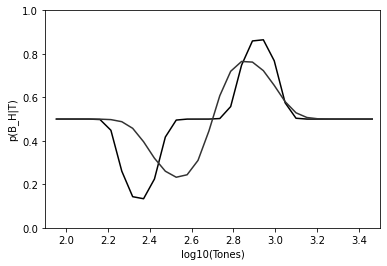

In [6]:
expt_log_freq_seq_array = np.arange(np.log10(90), np.log10(3000), \
                                   np.log10(1003/1000)*40)
unique_tones = np.unique(expt_log_freq_seq_array)


_,_,_,_,_,posterior = posterior_array(expt_log_freq_seq_array, 3, 0.7,0.5,[2.35,2.92,0.05])
tone1_prob_behaviour = np.zeros((len(unique_tones)))
tone2_prob_behaviour = np.zeros((len(unique_tones)))
tone3_prob_behaviour = np.zeros((len(unique_tones)))

for i_tone in range(len(unique_tones)):
    tone1_prob_behaviour[i_tone] = np.mean(posterior[i_tone,:,:])
    tone2_prob_behaviour[i_tone] = np.mean(posterior[:,i_tone,:])
    tone3_prob_behaviour[i_tone] = np.mean(posterior[:,:,i_tone])
    
back1, = plt.plot(unique_tones, (tone1_prob_behaviour+tone2_prob_behaviour+tone3_prob_behaviour)/3, 
         color=[0,0,0], label='pb=0.1')
    
_,_,_,_,_,posterior = posterior_array(expt_log_freq_seq_array, 3, 0.9,0.5,[2.55,2.85,0.1])
tone1_prob_behaviour = np.zeros((len(unique_tones)))
tone2_prob_behaviour = np.zeros((len(unique_tones)))
tone3_prob_behaviour = np.zeros((len(unique_tones)))

for i_tone in range(len(unique_tones)):
    tone1_prob_behaviour[i_tone] = np.mean(posterior[i_tone,:,:])
    tone2_prob_behaviour[i_tone] = np.mean(posterior[:,i_tone,:])
    tone3_prob_behaviour[i_tone] = np.mean(posterior[:,:,i_tone])
    
back2, = plt.plot(unique_tones, (tone1_prob_behaviour+tone2_prob_behaviour+tone3_prob_behaviour)/3, 
         color=[0.2,0.2,0.2], label='pb=0.4')

_,_,_,_,_,posterior = posterior_array(expt_log_freq_seq_array, 3, 0.7,0.5,[2.55,2.85,0.2])
tone1_prob_behaviour = np.zeros((len(unique_tones)))
tone2_prob_behaviour = np.zeros((len(unique_tones)))
tone3_prob_behaviour = np.zeros((len(unique_tones)))

for i_tone in range(len(unique_tones)):
    tone1_prob_behaviour[i_tone] = np.mean(posterior[i_tone,:,:])
    tone2_prob_behaviour[i_tone] = np.mean(posterior[:,i_tone,:])
    tone3_prob_behaviour[i_tone] = np.mean(posterior[:,:,i_tone])
    
#back3, = plt.plot(unique_tones, (tone1_prob_behaviour+tone2_prob_behaviour+tone3_prob_behaviour)/3, 
#         color=[0.4,0.4,0.4], label='pb=0.7')

_,_,_,_,_,posterior = posterior_array(expt_log_freq_seq_array, 3, 0.9,0.65,[2.55,2.85,0.1])
tone1_prob_behaviour = np.zeros((len(unique_tones)))
tone2_prob_behaviour = np.zeros((len(unique_tones)))
tone3_prob_behaviour = np.zeros((len(unique_tones)))

for i_tone in range(len(unique_tones)):
    tone1_prob_behaviour[i_tone] = np.mean(posterior[i_tone,:,:])
    tone2_prob_behaviour[i_tone] = np.mean(posterior[:,i_tone,:])
    tone3_prob_behaviour[i_tone] = np.mean(posterior[:,:,i_tone])
    
#back4, = plt.plot(unique_tones, (tone1_prob_behaviour+tone2_prob_behaviour+tone3_prob_behaviour)/3, 
#         color=[0.6,0.6,0.6], label='pb=0.9')

plt.xlim([1.9,3.5])
plt.ylim([0,1])
plt.xlabel('log10(Tones)')
plt.ylabel('p(B_H|T)')

# plt.savefig('figures/effect of sigma given three tones')

In [7]:
# experimental task
def task(freq_seq, lm, hm, s, n_trials = 10, n_tones = 3, p_low = 0.5, p_back = 0.3):
    expt_log_freq_seq_array = np.arange(np.log10(freq_seq[0]), np.log10(freq_seq[-1]), \
                                   np.log10(1003/1000)*40)
    print(expt_log_freq_seq_array)
    log_freq_seq_mid = np.median(expt_log_freq_seq_array)
    log_freq_low = [lm,s]#[log_freq_seq_mid - 0.15,0.1]  #low freq condition is gaussian 
    log_freq_high = [hm,s]#[log_freq_seq_mid + 0.15,0.1] #high freq condition is gaussian
    trial_tones = []
    dist_chosen = []
    kind_of_tones = []

    for trial in range(n_trials):
        signal_rand = np.random.random()
        low_dist = signal_rand < p_low #choosing true tone from either low or high condition
        tones = []
        tone_kind = []
        for n_tone in range(n_tones):
            signal_back = np.random.random()
            background = signal_back < p_back #choosing background or true tone
            if background:
                nearest_log_tone = np.random.choice(expt_log_freq_seq_array)
                #background freq is chosen from a uniform distribution
                tone_kind.append(0)
            else: 
                if low_dist:
                    tone = min(max(np.random.randn()*log_freq_low[1] + log_freq_low[0],\
                                   expt_log_freq_seq_array[0]),expt_log_freq_seq_array[-1])                    
                    tone_kind.append(1)
                else:
                    tone = min(max(np.random.randn()*log_freq_high[1] + log_freq_high[0],\
                                   expt_log_freq_seq_array[0]),expt_log_freq_seq_array[-1])
                    tone_kind.append(2)
                nearest_log_tone = expt_log_freq_seq_array[np.argmin(np.abs(expt_log_freq_seq_array - tone))]
            nearest_tone = freq_seq[np.argmin(np.abs(freq_seq - 10**nearest_log_tone))]        
            tones.append(nearest_tone)
        trial_tones.append(tones)
        dist_chosen.append(low_dist)
        kind_of_tones.append(tone_kind)
    return trial_tones, dist_chosen, kind_of_tones, log_freq_low, log_freq_high

In [8]:

def generate_behaviour(trial_tones, reps, n_tones, prob_back, prob_low, log_prior_params, sigma_sensory):
    """
    Trying two routes - 1. what if we have both sensory noise in that the perceived tones are from a gaussian 
    whose mean is the true tone and we have decision noise in that the at a particular perceived tone the observer 
    chooses high with probability p(H|T). So a trial is basically defined as [trial_tone, perceived_tone and 
    decision] 
    2. what if we only have sensory noise and the decision made is the best decision at a particular perceived 
    tone. 

    """    

    all_trial_tones = np.empty((len(trial_tones)*reps,n_tones))
    all_trial_behaviour = np.empty((len(trial_tones)*reps,1))
    prob_trial_behaviour = np.empty((len(trial_tones),1))
    probability_sim_high = np.zeros((len(trial_tones),1))

    _,_,LikelihoodLatentTonegivenHigh,LikelihoodLatentTonegivenLow,_,_ = \
    posterior_array(log_freq_percept, len(trial_tones[0]), p_back=prob_back, p_low=prob_low,
                    log_prior=log_prior_params)

    LikelihoodPerceptgivenHigh = np.zeros((len(log_freq_percept),len(log_freq_percept),len(log_freq_percept)))
    LikelihoodPerceptgivenLow = np.zeros((len(log_freq_percept),len(log_freq_percept),len(log_freq_percept)))

    for itrue1 in range(len(log_freq_percept)):
        for itrue2 in range(len(log_freq_percept)):
            for itrue3 in range(len(log_freq_percept)):
                probPerceptgivenLatentTones = Tones3dgrid([log_freq_percept[itrue1],
                                                           log_freq_percept[itrue2],
                                                           log_freq_percept[itrue3]],sigma=sigma_sensory)
                LikelihoodPerceptgivenHigh \
                += probPerceptgivenLatentTones * LikelihoodLatentTonegivenHigh[itrue1,itrue2,itrue3]
                LikelihoodPerceptgivenLow \
                += probPerceptgivenLatentTones * LikelihoodLatentTonegivenLow[itrue1,itrue2,itrue3]
    probHighgivenPercept = LikelihoodPerceptgivenHigh*(1-prob_low)/\
    (LikelihoodPerceptgivenHigh*(1-prob_low) + LikelihoodPerceptgivenLow*prob_low)

    for i_stim in range(len(trial_tones)):
        input_array = np.random.normal(loc=np.log10(trial_tones[i_stim]),scale=sigma_sensory,
                                       size=(reps,1,n_tones)) \
        #pick tones from the gaussian with mean as log(true_tone) and sensory sigma 0.1    
        for i_tperc in range(reps):
            perc_tone_idxs = np.zeros((n_tones,1),dtype=int)
            for i in range(n_tones):
                perc_tone_idxs[i] = np.argmin(np.abs(log_freq_percept-input_array[i_tperc][0][i]))
                # find relevant adjacent freq percepts   
            posterior_perc_tone = probHighgivenPercept[perc_tone_idxs[0],perc_tone_idxs[1],perc_tone_idxs[2]]
            # trial_behaviour = (np.random.random_sample() < np.squeeze(posterior_perc_tone)).astype(int)
            # this encodes decision noise
            trial_behaviour = np.squeeze(posterior_perc_tone) > 0.5
            # this makes the same choice for one tone percept every time that tone is perceived   
            all_trial_behaviour[i_stim*reps+i_tperc,:] = trial_behaviour
        all_trial_tones[i_stim*reps:(i_stim+1)*reps,:] = trial_tones[i_stim]    
        prob_trial_behaviour[i_stim] = np.mean(all_trial_behaviour[i_stim*reps:(i_stim+1)*reps])

        gaussian_array_mat = Tones3dgrid(np.array([np.log10(trial_tones[i_stim][0]),
                                                   np.log10(trial_tones[i_stim][1]),
                                                   np.log10(trial_tones[i_stim][2])]),sigma=sigma_sensory)         
        probability_sim_high[i_stim] = np.sum(np.multiply(probHighgivenPercept>0.5, gaussian_array_mat))


    """
    Shuffling the tones and the behaviour to simluate an experiment

    s = np.arange(all_trial_tones.shape[0])
    np.random.shuffle(s)
    all_trial_tones = all_trial_tones[s]
    all_trial_behaviour = all_trial_behaviour[s]
    """
    return all_trial_tones, all_trial_behaviour


In [10]:
"""
Ideal subject behaviour under all three strategies
"""
def idealSubjectBehaviour(tonesPresented):
    idealMeanBehaviour = (np.mean(tonesPresented,axis=1)>expt_freq_seq_mid).astype(int) 
    idealVotingBehaviour = (np.sum(tonesPresented>expt_freq_seq_mid,axis=1)>1).astype(int)
    idealSignalMeanBehaviour = np.copy(idealVotingBehaviour)
    for ibehv in range(len(idealSignalMeanBehaviour)):
        if (sum(tonesPresented[ibehv]>high_dist[0]+2*high_dist[1])
              + sum(tonesPresented[ibehv]<low_dist[0]-2*low_dist[1])==3):
            idealSignalMeanBehaviour[ibehv] = np.random.choice([0,1])
        elif (sum(tonesPresented[ibehv]>expt_freq_seq_mid)==2 
              and sum(tonesPresented[ibehv]<expt_freq_seq_mid)==1 
              and sum(tonesPresented[ibehv]>(high_dist[0]+2*high_dist[1]))==1
              and sum(tonesPresented[ibehv]<(low_dist[0]-2*low_dist[1]))==0):
            idealSignalMeanBehaviour[ibehv] = np.random.choice([0,1])
        elif (sum(tonesPresented[ibehv]>expt_freq_seq_mid)==1
              and sum(tonesPresented[ibehv]<expt_freq_seq_mid)==2 
              and sum(tonesPresented[ibehv]>(high_dist[0]+2*high_dist[1]))==0
              and sum(tonesPresented[ibehv]<(low_dist[0]-2*low_dist[1]))==1):
            idealSignalMeanBehaviour[ibehv] = np.random.choice([0,1]) 
        elif (sum(tonesPresented[ibehv]>(high_dist[0]+2*high_dist[1]))==0 
              and sum(tonesPresented[ibehv]>expt_freq_seq_mid)==1
              and sum(tonesPresented[ibehv]<(low_dist[0]-2*low_dist[1]))==2):
            idealSignalMeanBehaviour[ibehv] = 1 
        elif (sum(tonesPresented[ibehv]>(high_dist[0]+2*high_dist[1]))==2 
              and sum(tonesPresented[ibehv]<expt_freq_seq_mid)==1
              and sum(tonesPresented[ibehv]<(low_dist[0]-2*low_dist[1]))==0):  
            idealSignalMeanBehaviour[ibehv] = 0
    return idealMeanBehaviour, idealSignalMeanBehaviour, idealVotingBehaviour

In [21]:
"""
Given three true tones sample experiment
Perceptual tones and latent tones have a longer range than the experimental tones. 
They essentially go from -inf to inf.
"""

expt_tones = np.arange(90,3000,1) #array of possible true tones
expt_log_freq_seq_array = np.arange(np.log10(expt_tones[0]), np.log10(expt_tones[-1]), \
                               np.log10(1003/1000)*40)
expt_freq_seq_mid = np.median(expt_log_freq_seq_array)
low_dist = [expt_freq_seq_mid - 0.15,0.1]
high_dist = [expt_freq_seq_mid + 0.15,0.1]

log_freq_percept = np.arange(0.6,4.7,0.1) 
latent_log_freq_seq_array = np.arange(0.6,4.7,0.1) 

def sample_expt(pb,pl,pl_orig,s,ss,lm,hm):
    training_trials, dist_chosen, tone_kind, low_dist, high_dist = task(freq_seq = expt_tones, 
                                                                        n_trials = 500, n_tones = 3, 
                                                                        p_back=0.3, p_low=pl_orig,
                                                                        lm=2.55,hm=2.85,s=0.1)

    all_trial_tones, all_trial_behaviour = generate_behaviour(training_trials, reps=1, n_tones=3, 
                                                              prob_back=pb, prob_low=pl, 
                                                              log_prior_params=[lm,hm,s], 
                                                              sigma_sensory=ss)
    
    idealSubjMeanBhv, idealSubjSignalMeanBhv, idealSubjVotingBhv = idealSubjectBehaviour(np.log10(all_trial_tones))
    
    return all_trial_tones, all_trial_behaviour, idealSubjMeanBhv, idealSubjSignalMeanBhv, idealSubjVotingBhv

[trial_tones_noContext, trial_behaviour_noContext,
 MeanBhv, SignalMeanBhv, VotingBhv] = sample_expt(lm=2.55,hm=2.85,s=0.1,
                                                  ss=0.2,pb=0.3,pl=0.5,
                                                  pl_orig=0.5)

#[trial_tones_highNoise, trial_behaviour_highNoise, 
# MeanBhv_highNoise, SignalMeanBhv_highNoise, VotingBhv_highNoise] = sample_expt(lm=2.55,hm=2.85,s=0.1,
#                                                                              ss=0.2,pb=0.5,pl=0.5,
#                                                                              pl_orig=0.5)

#[trial_tones_highestNoise, trial_behaviour_highestNoise, 
# MeanBhv_highestNoise, SignalMeanBhv_highestNoise, VotingBhv_highestNoise] = sample_expt(lm=2.55,hm=2.85,s=0.1,
#                                                                                          ss=0.5,pb=0.8,pl=0.5,
#                                                                                          pl_orig=0.5)

[1.95424251 2.00627983 2.05831715 2.11035447 2.16239179 2.21442911
 2.26646643 2.31850376 2.37054108 2.4225784  2.47461572 2.52665304
 2.57869036 2.63072768 2.682765   2.73480232 2.78683964 2.83887696
 2.89091428 2.9429516  2.99498893 3.04702625 3.09906357 3.15110089
 3.20313821 3.25517553 3.30721285 3.35925017 3.41128749 3.46332481]


NameError: name 'trial_tones_highNoise' is not defined

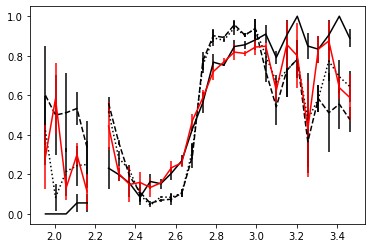

In [22]:
"""
This block works through how the marginalization of p(B_H|T_1) works. 
Here the average using np.mean is shown to be equivalent to \sigma \sigma p(B_H|T1, T2, T3) p(T2,T3|T1)
"""

unique_tones = np.unique(trial_tones_noContext)
""""
allsubject_mean = np.mean([mean_1396, mean_1604, mean_1c3f, mean_6b7f, 
                           mean_c2e0, mean_d619, mean_b4c7, mean_a12e, mean_735a], axis=0)
allsubject_std = np.std([mean_1396, mean_1604, mean_1c3f, mean_6b7f, 
                        mean_c2e0, mean_d619, mean_b4c7, mean_a12e, mean_735a], axis=0)
avg_prob = plt.errorbar(np.log10(unique_tones), allsubject_mean, yerr=allsubject_std/np.sqrt(9), color='red')   

allsubject_lcmean = np.mean([meanlc_c2e0, meanlc_1604, meanlc_1c3f, meanlc_6b7f,
                          meanlc_1396, meanlc_a12e, meanlc_d619, meanlc_b4c7, meanlc_735a], axis=0)
allsubject_lcstd = np.std([meanlc_c2e0, meanlc_1604, meanlc_1c3f, meanlc_6b7f,
                          meanlc_1396, meanlc_a12e, meanlc_d619, meanlc_b4c7, meanlc_735a], axis=0)
avg_lcprob = plt.errorbar(np.log10(unique_tones), allsubject_lcmean, yerr=allsubject_lcstd/np.sqrt(9), color='blue')   
"""
tone1_prob_behaviour = np.zeros((len(unique_tones)))
tone2_prob_behaviour = np.zeros((len(unique_tones)))
tone3_prob_behaviour = np.zeros((len(unique_tones)))

for i_tone in range(len(unique_tones)):
    tone1_prob_behaviour[i_tone] = np.mean(MeanBhv[trial_tones_noContext[:,0]==unique_tones[i_tone]])
    tone2_prob_behaviour[i_tone] = np.mean(MeanBhv[trial_tones_noContext[:,1]==unique_tones[i_tone]])
    tone3_prob_behaviour[i_tone] = np.mean(MeanBhv[trial_tones_noContext[:,2]==unique_tones[i_tone]])

sim_mean = np.mean([tone1_prob_behaviour,tone2_prob_behaviour,tone3_prob_behaviour],axis=0)
sim_std = np.std([tone1_prob_behaviour,tone2_prob_behaviour,tone3_prob_behaviour],axis=0)
plt.errorbar(np.log10(unique_tones), sim_mean, yerr=sim_std/np.sqrt(3), color='black')  

for i_tone in range(len(unique_tones)):
    tone1_prob_behaviour[i_tone] = np.mean(SignalMeanBhv[trial_tones_noContext[:,0]==unique_tones[i_tone]])
    tone2_prob_behaviour[i_tone] = np.mean(SignalMeanBhv[trial_tones_noContext[:,1]==unique_tones[i_tone]])
    tone3_prob_behaviour[i_tone] = np.mean(SignalMeanBhv[trial_tones_noContext[:,2]==unique_tones[i_tone]])
    
sim_mean = np.mean([tone1_prob_behaviour,tone2_prob_behaviour,tone3_prob_behaviour],axis=0)
sim_std = np.std([tone1_prob_behaviour,tone2_prob_behaviour,tone3_prob_behaviour],axis=0)    
plt.errorbar(np.log10(unique_tones), sim_mean, yerr=sim_std/np.sqrt(3), color='black', ls='--')  

for i_tone in range(len(unique_tones)):
    tone1_prob_behaviour[i_tone] = np.mean(VotingBhv[trial_tones_noContext[:,0]==unique_tones[i_tone]])
    tone2_prob_behaviour[i_tone] = np.mean(VotingBhv[trial_tones_noContext[:,1]==unique_tones[i_tone]])
    tone3_prob_behaviour[i_tone] = np.mean(VotingBhv[trial_tones_noContext[:,2]==unique_tones[i_tone]])
    
sim_mean = np.mean([tone1_prob_behaviour,tone2_prob_behaviour,tone3_prob_behaviour],axis=0)
sim_std = np.std([tone1_prob_behaviour,tone2_prob_behaviour,tone3_prob_behaviour],axis=0)    
plt.errorbar(np.log10(unique_tones), sim_mean, yerr=sim_std/np.sqrt(3), color='black', ls=':')  

for i_tone in range(len(unique_tones)):
    tone1_prob_behaviour[i_tone] = np.mean(trial_behaviour_noContext[trial_tones_noContext[:,0]==unique_tones[i_tone]])
    tone2_prob_behaviour[i_tone] = np.mean(trial_behaviour_noContext[trial_tones_noContext[:,1]==unique_tones[i_tone]])
    tone3_prob_behaviour[i_tone] = np.mean(trial_behaviour_noContext[trial_tones_noContext[:,2]==unique_tones[i_tone]])

expt_mean = np.mean([tone1_prob_behaviour,tone2_prob_behaviour,tone3_prob_behaviour],axis=0)
expt_std = np.std([tone1_prob_behaviour,tone2_prob_behaviour,tone3_prob_behaviour],axis=0)    
plt.errorbar(np.log10(unique_tones), expt_mean, yerr=expt_std/np.sqrt(3), color='red')  
    
unique_tones = np.unique(trial_tones_highNoise)
tone1_prob_behaviour = np.zeros((len(unique_tones)))
tone2_prob_behaviour = np.zeros((len(unique_tones)))
tone3_prob_behaviour = np.zeros((len(unique_tones)))

for i_tone in range(len(unique_tones)):
    tone1_prob_behaviour[i_tone] = np.mean(trial_behaviour_highNoise[trial_tones_highNoise[:,0]==unique_tones[i_tone]])
    tone2_prob_behaviour[i_tone] = np.mean(trial_behaviour_highNoise[trial_tones_highNoise[:,1]==unique_tones[i_tone]])
    tone3_prob_behaviour[i_tone] = np.mean(trial_behaviour_highNoise[trial_tones_highNoise[:,2]==unique_tones[i_tone]])

expt_mean = np.mean([tone1_prob_behaviour,tone2_prob_behaviour,tone3_prob_behaviour],axis=0)
expt_std = np.std([tone1_prob_behaviour,tone2_prob_behaviour,tone3_prob_behaviour],axis=0)    
#plt.errorbar(np.log10(unique_tones), expt_mean, yerr=expt_std/np.sqrt(3), color='blue')

unique_tones = np.unique(trial_tones_highestNoise)
tone1_prob_behaviour = np.zeros((len(unique_tones)))
tone2_prob_behaviour = np.zeros((len(unique_tones)))
tone3_prob_behaviour = np.zeros((len(unique_tones)))

for i_tone in range(len(unique_tones)):
    tone1_prob_behaviour[i_tone] = np.mean(trial_behaviour_highestNoise[trial_tones_highestNoise[:,0]==unique_tones[i_tone]])
    tone2_prob_behaviour[i_tone] = np.mean(trial_behaviour_highestNoise[trial_tones_highestNoise[:,1]==unique_tones[i_tone]])
    tone3_prob_behaviour[i_tone] = np.mean(trial_behaviour_highestNoise[trial_tones_highestNoise[:,2]==unique_tones[i_tone]])

expt_mean = np.mean([tone1_prob_behaviour,tone2_prob_behaviour,tone3_prob_behaviour],axis=0)
expt_std = np.std([tone1_prob_behaviour,tone2_prob_behaviour,tone3_prob_behaviour],axis=0)    
#plt.errorbar(np.log10(unique_tones), expt_mean, yerr=expt_std/np.sqrt(3), color='green')  

plt.xlim([1.9,3.6])
plt.xticks(ticks=np.arange(1.9,3.6,0.3), labels=np.around(10**np.arange(1.9,3.6,0.3),2),fontsize=13)
plt.yticks(fontsize=13)
plt.ylim([-0.1,1.1])
plt.xlabel('Tones',fontsize=13)
plt.ylabel('p(B_H|T)',fontsize=13)
#plt.savefig('figures/FromProlific/illustrations/idealSubject_StrategyComparison')

In [ ]:
# define mle function
def MLE(params):
    log_prior_low_mean, log_prior_high_mean, log_prior_sigma, sigma_sensory, prob_back, prob_low = \
    params[0], params[1], params[2], params[3], params[4], params[5] # inputs are guesses at our parameters  
        
    _,_,LikelihoodLatentTonegivenHigh,LikelihoodLatentTonegivenLow,_,_ = \
    posterior_array(log_freq_percept, len(trial_tones_noContext[0]), p_back=prob_back, p_low=prob_low,\
                    log_prior=[log_prior_low_mean,log_prior_high_mean,log_prior_sigma])

    LikelihoodPerceptgivenHigh = np.zeros((len(log_freq_percept),len(log_freq_percept),len(log_freq_percept)))
    LikelihoodPerceptgivenLow = np.zeros((len(log_freq_percept),len(log_freq_percept),len(log_freq_percept)))
    
    for itrue1 in range(len(log_freq_percept)):
        for itrue2 in range(len(log_freq_percept)):
            for itrue3 in range(len(log_freq_percept)):
                probPerceptgivenLatentTones = Tones3dgrid([log_freq_percept[itrue1],\
                                                           log_freq_percept[itrue2],\
                                                           log_freq_percept[itrue3]],sigma=sigma_sensory)
                LikelihoodPerceptgivenHigh \
                += probPerceptgivenLatentTones * LikelihoodLatentTonegivenHigh[itrue1,itrue2,itrue3]
                LikelihoodPerceptgivenLow \
                += probPerceptgivenLatentTones * LikelihoodLatentTonegivenLow[itrue1,itrue2,itrue3]
    probHighgivenPercept = LikelihoodPerceptgivenHigh*(1-prob_low)/\
    (LikelihoodPerceptgivenHigh*(1-prob_low) + LikelihoodPerceptgivenLow*(prob_low))
        
    neg_ll = 0; 
    probability_high = np.zeros((len(trial_tones_noContext),1))
    for i_trial in range(len(trial_tones_noContext)):
        input_array_mat = Tones3dgrid(np.array([np.log10(trial_tones_noContext[i_trial][0]),\
                                               np.log10(trial_tones_noContext[i_trial][1]),
                                               np.log10(trial_tones_noContext[i_trial][2])]),sigma=sigma_sensory)
        probability_high0 = np.sum(np.multiply(probHighgivenPercept>0.5,input_array_mat))
        probability_high[i_trial] = np.sum(np.multiply(probHighgivenPercept>0.5,input_array_mat))
            
        if trial_behaviour_noContext[i_trial]:
            if np.isnan(np.log(probability_high0 + 0.0000001)) \
            or np.isinf(np.log(probability_high0 + 0.0000001)) \
            or np.isnan(np.log(1-probability_high0 + 0.0000001)) \
            or np.isinf(np.log(1-probability_high0 + 0.0000001)):
                pdb.set_trace()
            neg_ll += -np.log(probability_high0 + 0.0000001) # if high dist is chosen by observer
        else:
            neg_ll += -np.log(1 - probability_high0 + 0.0000001) # if low dist is chosen by observer   
    return(neg_ll, probability_high)

In [ ]:
"""
New optimization algorithm: uses scipy.optimize.fmin. 
Crude grid initially and then find minimum using the function.
"""

guess_low_mean = np.arange(2.1,2.71,0.15); guess_high_mean = np.arange(2.7,3.31,0.15); 
guess_sigma = np.arange(0.05,1,0.2); guess_sensory_sigma = np.arange(0.05,1,0.2);
guess_p_back = np.arange(0.05,1,0.2); guess_p_low = np.arange(0.05,1,0.2)

# Constraining guesses of means of low and high distributions based on observed behaviour in figure shown above. 

neg_ll_array = np.zeros((len(guess_low_mean), len(guess_high_mean), len(guess_sigma), 
                         len(guess_sensory_sigma), len(guess_p_back), len(guess_p_low)))
for lm in tqdm(range(len(guess_low_mean))):
    for hm in tqdm(range(len(guess_high_mean)), leave=False, desc="High mean"):
        f = open("auditory_categorization_prolific_online_data/preprocess_results/90-3000_100%_logPerceptAndLogLatent_GoFrom-InfToInf/results_from_cluster/resultsProlificData/SimulatedSubject_ss0pt1_pback0pt9.txt","a+")
        for s in range(len(guess_sigma)):
            for ss in range(len(guess_sensory_sigma)):
                for pb in range(len(guess_p_back)):
                    for pl in range(len(guess_p_low)):
                        params = [guess_low_mean[lm], guess_high_mean[hm], guess_sigma[s], 
                                  guess_sensory_sigma[ss], guess_p_back[pb], guess_p_low[pl]]
                        # print(lm, hm, pb)
                        neg_ll_array[lm,hm,s,ss,pb,pl],_ = MLE(params) 
                        f.write("%s\n" % neg_ll_array[lm,hm,s,ss,pb,pl])
                        f.flush()
        f.close()
                    
"""
Means and p_back corresponding to the least negative log likelihood value
"""
idxs = np.where(neg_ll_array == np.amin(neg_ll_array)) 
best_thetas = np.array([guess_low_mean[idxs[0]], guess_high_mean[idxs[1]], guess_sigma[idxs[2]], \
                        guess_sensory_sigma[idxs[3]], guess_p_back[idxs[4]], guess_p_low[idxs[5]]])

print(best_thetas)

In [ ]:
# define mle function
def MLE_fmin(params):
    log_prior_low_mean, log_prior_high_mean, log_prior_sigma, sigma_sensory, prob_back, prob_low = \
    params[0], params[1], params[2], params[3], params[4], params[5] # inputs are guesses at our parameters  
    
    _,_,LikelihoodLatentTonegivenHigh,LikelihoodLatentTonegivenLow,_,_ = \
    posterior_array(log_freq_percept, len(trial_tones_noContext[0]), p_back=prob_back, p_low=prob_low,\
                    log_prior=[log_prior_low_mean,log_prior_high_mean,log_prior_sigma])

    LikelihoodPerceptgivenHigh = np.zeros((len(log_freq_percept),len(log_freq_percept),len(log_freq_percept)))
    LikelihoodPerceptgivenLow = np.zeros((len(log_freq_percept),len(log_freq_percept),len(log_freq_percept)))
    
    for itrue1 in range(len(log_freq_percept)):
        for itrue2 in range(len(log_freq_percept)):
            for itrue3 in range(len(log_freq_percept)):
                probPerceptgivenLatentTones = Tones3dgrid([log_freq_percept[itrue1],\
                                                           log_freq_percept[itrue2],\
                                                           log_freq_percept[itrue3]],sigma=sigma_sensory)
                LikelihoodPerceptgivenHigh \
                += probPerceptgivenLatentTones * LikelihoodLatentTonegivenHigh[itrue1,itrue2,itrue3]
                LikelihoodPerceptgivenLow \
                += probPerceptgivenLatentTones * LikelihoodLatentTonegivenLow[itrue1,itrue2,itrue3]
    probHighgivenPercept = LikelihoodPerceptgivenHigh*(1-prob_low)/\
    (LikelihoodPerceptgivenHigh*(1-prob_low) + LikelihoodPerceptgivenLow*(prob_low))
        
    neg_ll = 0; 
    probability_high = np.zeros((len(trial_tones_noContext),1))
    for i_trial in range(len(trial_tones_noContext)):
        input_array_mat = Tones3dgrid(np.array([np.log10(trial_tones_noContext[i_trial][0]),\
                                               np.log10(trial_tones_noContext[i_trial][1]),
                                               np.log10(trial_tones_noContext[i_trial][2])]),sigma=sigma_sensory)
        probability_high0 = np.sum(np.multiply(probHighgivenPercept>0.5,input_array_mat))
        probability_high[i_trial] = np.sum(np.multiply(probHighgivenPercept>0.5,input_array_mat))
            
        if trial_behaviour_noContext[i_trial]:
            if np.isnan(np.log(probability_high0 + 0.0000001)) \
            or np.isinf(np.log(probability_high0 + 0.0000001)) \
            or np.isnan(np.log(1-probability_high0 + 0.0000001)) \
            or np.isinf(np.log(1-probability_high0 + 0.0000001)):
                pdb.set_trace()
            neg_ll += -np.log(probability_high0 + 0.0000001) # if high dist is chosen by observer
        else:
            neg_ll += -np.log(1 - probability_high0 + 0.0000001) # if low dist is chosen by observer  
    print(params, neg_ll)        
    return(neg_ll)

minimum_nll = scipy.optimize.fmin(MLE_fmin, [2.55,2.85,0.1,0.1,0.9,0.5], maxiter=10000, maxfun=10000, 
                                  xtol=0.01, ftol=0.01)

print(minimum_nll)

In [ ]:
def Tones3dgridFinelySampled(latentTones, freq_seq, sigma):
    
    input_array_0 = np.expand_dims(gaussian(freq_seq, latentTones[0], sigma), axis = 1)
    input_array_1 = np.expand_dims(gaussian(freq_seq, latentTones[1], sigma), axis = 1)
    input_array_2 = np.expand_dims(gaussian(freq_seq, latentTones[2], sigma), axis = 1)
    s0 = 1/np.sum(input_array_0); s1 = 1/np.sum(input_array_1); s2 = 1/np.sum(input_array_2)
    input_array_0 *= s0; input_array_1 *= s1; input_array_2 *= s2; 
    
    input_array_mat = np.expand_dims(input_array_0@input_array_1.T,axis=2)@(input_array_2.T) #p(T1,T2..|H)     
    #input_array_mat = input_array_0
                                     
    return input_array_mat

def posteriorAgainstPercept(expt_Params):
    [_,_,mle_LikelihoodLatentTonegivenHigh,
    mle_LikelihoodLatentTonegivenLow,_,mle_posterior] = posterior_array(freq_input=log_freq_perceptFinelySampled,
                                                                        n_tones=3,
                                                                        p_back=expt_Params[4], 
                                                                        p_low=expt_Params[5],
                                                                        log_prior=expt_Params[:3]) 
    
    
    mle_LikelihoodPerceptgivenHigh = np.zeros((len(log_freq_perceptFinelySampled),
                                               len(log_freq_perceptFinelySampled),len(log_freq_perceptFinelySampled)))
    mle_LikelihoodPerceptgivenLow = np.zeros((len(log_freq_perceptFinelySampled),
                                              len(log_freq_perceptFinelySampled),len(log_freq_perceptFinelySampled)))

    for itrue1 in range(len(log_freq_perceptFinelySampled)):
        for itrue2 in range(len(log_freq_perceptFinelySampled)):
            for itrue3 in range(len(log_freq_perceptFinelySampled)):
                mle_probPerceptgivenLatentTones = Tones3dgridFinelySampled([log_freq_perceptFinelySampled[itrue1],
                                                                           log_freq_perceptFinelySampled[itrue2],
                                                                           log_freq_perceptFinelySampled[itrue3]],
                                                                           freq_seq = log_freq_perceptFinelySampled,
                                                                           sigma=expt_Params[3])
                mle_LikelihoodPerceptgivenHigh \
                += mle_probPerceptgivenLatentTones * mle_LikelihoodLatentTonegivenHigh[itrue1,itrue2,itrue3]
                mle_LikelihoodPerceptgivenLow \
                += mle_probPerceptgivenLatentTones * mle_LikelihoodLatentTonegivenLow[itrue1,itrue2,itrue3]
    mle_probHighgivenPercept = mle_LikelihoodPerceptgivenHigh*(1-expt_Params[5])/\
    (mle_LikelihoodPerceptgivenHigh*(1-expt_Params[5]) + mle_LikelihoodPerceptgivenLow*expt_Params[5])
    return mle_probHighgivenPercept


In [ ]:
log_freq_perceptFinelySampled=np.arange(0.6,4.7,0.05)
"""
Comparing posteriors obtained using original mle parameters, and those derived from min and max 
(sigma_s, sigma_ss) ranges.
"""
#origMLE_probHighgivenPercept = posteriorAgainstPercept([2.55,2.85,0.1,0.1,0.9,0.5])

tone1_prob_behaviour = np.zeros((len(log_freq_perceptFinelySampled)))
tone2_prob_behaviour = np.zeros((len(log_freq_perceptFinelySampled)))
tone3_prob_behaviour = np.zeros((len(log_freq_perceptFinelySampled)))

for i_tone in range(len(log_freq_perceptFinelySampled)):
    tone1_prob_behaviour[i_tone] = np.mean(origMLE_probHighgivenPercept[i_tone,:,:])
    tone2_prob_behaviour[i_tone] = np.mean(origMLE_probHighgivenPercept[:,i_tone,:])
    tone3_prob_behaviour[i_tone] = np.mean(origMLE_probHighgivenPercept[:,:,i_tone])

plt.figure()
plt.plot(log_freq_perceptFinelySampled, (tone1_prob_behaviour+tone2_prob_behaviour+tone3_prob_behaviour)/3, 
         color='k')

minMLE_probHighgivenPercept = posteriorAgainstPercept([2.51,2.95,0.04,0.092,0.027,0.29])

tone1_prob_behaviour = np.zeros((len(log_freq_perceptFinelySampled)))
tone2_prob_behaviour = np.zeros((len(log_freq_perceptFinelySampled)))
tone3_prob_behaviour = np.zeros((len(log_freq_perceptFinelySampled)))

for i_tone in range(len(log_freq_perceptFinelySampled)):
    tone1_prob_behaviour[i_tone] = np.mean(minMLE_probHighgivenPercept[i_tone,:,:])
    tone2_prob_behaviour[i_tone] = np.mean(minMLE_probHighgivenPercept[:,i_tone,:])
    tone3_prob_behaviour[i_tone] = np.mean(minMLE_probHighgivenPercept[:,:,i_tone])

plt.plot(log_freq_perceptFinelySampled, (tone1_prob_behaviour+tone2_prob_behaviour+tone3_prob_behaviour)/3, 
         'k--')
plt.xlabel('Tones',fontsize=15)
plt.ylabel('p(B_H|T)',fontsize=15)
plt.xticks(ticks=np.arange(0.6,4.7,1), labels=np.around(10**np.arange(0.6,4.7,1),2),fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()    

unique_tones = np.unique(trial_tones_noContext)
tone1_prob_behaviour = np.zeros((len(unique_tones)))
tone2_prob_behaviour = np.zeros((len(unique_tones)))
tone3_prob_behaviour = np.zeros((len(unique_tones)))

for i_tone in range(len(unique_tones)):
    tone1_prob_behaviour[i_tone] = np.mean(trial_behaviour_noContext[trial_tones_noContext[:,0]==unique_tones[i_tone]])
    tone2_prob_behaviour[i_tone] = np.mean(trial_behaviour_noContext[trial_tones_noContext[:,1]==unique_tones[i_tone]])
    tone3_prob_behaviour[i_tone] = np.mean(trial_behaviour_noContext[trial_tones_noContext[:,2]==unique_tones[i_tone]])
    
plt.figure()    
plt.plot(np.log10(unique_tones), (tone1_prob_behaviour+tone2_prob_behaviour+tone3_prob_behaviour)/3, 'k')

trial_tones, trial_behaviour, _, _, _ = sample_expt(pb=0.027,pl=0.29,s=0.04,ss=0.092,lm=2.51,hm=2.95, pl_orig=0.5)

unique_tones = np.unique(trial_tones)
tone1_prob_behaviour = np.zeros((len(unique_tones)))
tone2_prob_behaviour = np.zeros((len(unique_tones)))
tone3_prob_behaviour = np.zeros((len(unique_tones)))

for i_tone in range(len(unique_tones)):
    tone1_prob_behaviour[i_tone] = np.mean(trial_behaviour[trial_tones[:,0]==unique_tones[i_tone]])
    tone2_prob_behaviour[i_tone] = np.mean(trial_behaviour[trial_tones[:,1]==unique_tones[i_tone]])
    tone3_prob_behaviour[i_tone] = np.mean(trial_behaviour[trial_tones[:,2]==unique_tones[i_tone]])
    
plt.plot(np.log10(unique_tones), (tone1_prob_behaviour+tone2_prob_behaviour+tone3_prob_behaviour)/3, 'k--')

"""
lowProbDist, highProbDist = visualizeProbDistributions(sample_x=log_freq_percept,
                                                       log_freq_low=[2.63,0.39],
                                                       log_freq_high=[2.72,0.39])
plt.figure()
plt.plot(log_freq_percept,(1-0.06)*lowProbDist+0.06*np.ones(len(log_freq_percept))/len(log_freq_percept),'k')
plt.plot(log_freq_percept,(1-0.06)*highProbDist+0.06*np.ones(len(log_freq_percept))/len(log_freq_percept),'k')
plt.xlabel('Tones',fontsize=15)
plt.ylabel('Probability',fontsize=15)
plt.xticks(ticks=np.arange(0.9,4.7,0.8), labels=np.around(10**np.arange(0.9,4.7,0.8),2),fontsize=14)
plt.yticks(fontsize=15)
plt.tight_layout()  
"""

In [ ]:
"""
Is p(B_H|T) using mean the same as marginalizing over the other two tones? 
"""

log_unique_tones = np.log10(unique_tones)
dTones = np.mean(np.diff(log_unique_tones))

probFirstTonegivenHigh, probFirstTonegivenLow, _, _, \
probThreeTonesgivenCategory, probHighgivenThreeTones = posterior_array(log_unique_tones, n_tones=3, 
                                                                           p_back=0.3, p_low=0.5, 
                                                                           log_prior=[2.55,2.85,0.1])

probFirstTonegivenHigh = np.expand_dims(probFirstTonegivenHigh, axis=2)
probFirstTonegivenLow = np.expand_dims(probFirstTonegivenLow, axis=2)
probTwoTonesgivenFirstTone  = probThreeTonesgivenCategory/(probFirstTonegivenHigh*0.5+probFirstTonegivenLow*0.5) 

probHighBehaviourgivenFirstTone = np.zeros((len(log_unique_tones),1))

for ii in range(len(log_unique_tones)):
    probHighBehaviourgivenFirstTone[ii] = np.sum(probHighgivenThreeTones[ii,:,:]*\
                                                 probTwoTonesgivenFirstTone[ii,:,:])    
plt.plot(log_unique_tones, probHighBehaviourgivenFirstTone)

In [ ]:
def shortterm_context(trial_tones, trial_behaviour, corrans_num, keys_num):
    """
    This is a different way of plotting the influence function, though very similar to the inital kind. 
    We also compare this to the short term context plots. 
    """

    nobias_tones = np.unique(trial_tones)
    dict_behaviour = {}
    bev = np.zeros((len(nobias_tones)))

    for i_tone in range(len(nobias_tones)):
        temp = np.array([],dtype=int)
        for itrial in range(len(trial_tones)):
            if nobias_tones[i_tone] in trial_tones[itrial]:
                temp = np.append(temp,int(itrial))
        dict_behaviour[i_tone] = temp.astype(int)        
        bev[i_tone] = np.mean(trial_behaviour[dict_behaviour[i_tone]])

    """
    Plot responses when the previous n responses are H
    """
    n=1
    idxPrevBHigh=[]; idxPrevBHighCurrHigh=[]; idxPrevBHighCurrLow=[];
    for ii in range(n,len(trial_tones)):
        if sum(corrans_num[ii-n:ii])==n and sum(keys_num[ii-n:ii])==n: 
            if keys_num[ii]==1:
                idxPrevBHighCurrHigh+=[ii]
            else:
                idxPrevBHighCurrLow+=[ii]
            idxPrevBHigh+=[ii]    
    print(len(idxPrevBHighCurrHigh),len(idxPrevBHighCurrLow))
    
    idxPrevBLow=[]; idxPrevBLowCurrLow=[]; idxPrevBLowCurrHigh=[];
    for ii in range(n,len(trial_tones)):
        if sum(corrans_num[ii-n:ii])==0 and sum(keys_num[ii-n:ii])==0: 
            if keys_num[ii]==1:
                idxPrevBLowCurrHigh+=[ii]
            else:
                idxPrevBLowCurrLow+=[ii]
            idxPrevBLow+=[ii]    
    print(len(idxPrevBLowCurrHigh),len(idxPrevBLowCurrLow))

    scPrevBHigh_trialtones = trial_tones[idxPrevBHigh,:]
    scPrevBHigh_trialbehaviour = trial_behaviour[idxPrevBHigh]

    scBHigh_tones = np.unique(scPrevBHigh_trialtones)
    bev_scBHigh= np.zeros((len(scBHigh_tones)))

    for i_tone in range(len(scBHigh_tones)):
        temp = np.array([],dtype=int)
        for itrial in range(len(scPrevBHigh_trialtones)):
            if scBHigh_tones[i_tone] in scPrevBHigh_trialtones[itrial]:
                temp = np.append(temp,int(itrial))
        dict_behaviour[i_tone] = temp.astype(int)        
        bev_scBHigh[i_tone] = np.mean(scPrevBHigh_trialbehaviour[dict_behaviour[i_tone]])
        
    return idxPrevBHigh, idxPrevBHighCurrHigh, idxPrevBHighCurrLow, \
idxPrevBLow, idxPrevBLowCurrHigh, idxPrevBLowCurrLow

idxPrevBHigh, idxPrevBHighCurrHigh, idxPrevBHighCurrLow, \
idxPrevBLow, idxPrevBLowCurrHigh, idxPrevBLowCurrLow = shortterm_context(trial_tones, trial_behaviour,
                                                                         1-np.array(corrans_num), trial_behaviour)

ratioHigh = len(idxPrevBHighCurrLow)/(len(idxPrevBHighCurrLow)+len(idxPrevBHighCurrHigh))
ratioLow = len(idxPrevBLowCurrLow)/(len(idxPrevBLowCurrLow)+len(idxPrevBLowCurrHigh))
print(ratioHigh, ratioLow)

In [ ]:
# define mle function
def MLE(params):
    log_prior_low_mean, log_prior_high_mean, log_prior_sigma, sigma_sensory, prob_back, prob_low, alpha = \
    params[0], params[1], params[2], params[3], params[4], params[5], params[6] # inputs are parameters guesses
    
    scPrevBhigh_prob_low = alpha*prob_low + (1-alpha)*0 
    scPrevBlow_prob_low = alpha*prob_low + (1-alpha)
    
    _,_,LikelihoodLatentTonegivenHigh,LikelihoodLatentTonegivenLow,_,_ = \
    posterior_array(latent_log_freq_seq_array, len(trial_tones[0]), p_back=prob_back, p_low=prob_low,\
                    log_prior=[log_prior_low_mean,log_prior_high_mean,log_prior_sigma])

    LikelihoodPerceptgivenHigh = np.zeros((len(log_freq_percept),len(log_freq_percept),len(log_freq_percept)))
    LikelihoodPerceptgivenLow = np.zeros((len(log_freq_percept),len(log_freq_percept),len(log_freq_percept)))
    
    for itrue1 in range(len(latent_log_freq_seq_array)):
        for itrue2 in range(len(latent_log_freq_seq_array)):
            for itrue3 in range(len(latent_log_freq_seq_array)):
                probPerceptgivenLatentTones = Tones3dgrid([latent_log_freq_seq_array[itrue1],\
                                                           latent_log_freq_seq_array[itrue2],\
                                                           latent_log_freq_seq_array[itrue3]],sigma=sigma_sensory)
                LikelihoodPerceptgivenHigh \
                += probPerceptgivenLatentTones * LikelihoodLatentTonegivenHigh[itrue1,itrue2,itrue3]
                LikelihoodPerceptgivenLow \
                += probPerceptgivenLatentTones * LikelihoodLatentTonegivenLow[itrue1,itrue2,itrue3]
    probHighgivenPercept = LikelihoodPerceptgivenHigh*(1-prob_low)/\
    (LikelihoodPerceptgivenHigh*(1-prob_low) + LikelihoodPerceptgivenLow*(prob_low))
    
    scPrevBHigh_probHighgivenPercept = LikelihoodPerceptgivenHigh*(1-scPrevBhigh_prob_low)/\
    (LikelihoodPerceptgivenHigh*(1-scPrevBhigh_prob_low) + LikelihoodPerceptgivenLow*(scPrevBhigh_prob_low))
    
    scPrevBLow_probHighgivenPercept = LikelihoodPerceptgivenHigh*(1-scPrevBlow_prob_low)/\
    (LikelihoodPerceptgivenHigh*(1-scPrevBlow_prob_low) + LikelihoodPerceptgivenLow*(scPrevBlow_prob_low))
    
    neg_ll = 0; 
    probability_high = np.zeros((len(trial_tones),1))
    for i_trial in range(len(trial_tones)):
        input_array_mat = Tones3dgrid(np.array([np.log10(trial_tones[i_trial][0]),\
                                               np.log10(trial_tones[i_trial][1]),
                                               np.log10(trial_tones[i_trial][2])]),sigma=sigma_sensory)
        if i_trial in idxPrevBHigh:
            probability_high0 = np.sum(np.multiply(scPrevBHigh_probHighgivenPercept>0.5,input_array_mat))
            probability_high[i_trial] = np.sum(np.multiply(scPrevBHigh_probHighgivenPercept>0.5,input_array_mat))
        elif i_trial in idxPrevBLow:
            probability_high0 = np.sum(np.multiply(scPrevBLow_probHighgivenPercept>0.5,input_array_mat))
            probability_high[i_trial] = np.sum(np.multiply(scPrevBLow_probHighgivenPercept>0.5,input_array_mat))
        else:
            probability_high0 = np.sum(np.multiply(probHighgivenPercept>0.5,input_array_mat))
            probability_high[i_trial] = np.sum(np.multiply(probHighgivenPercept>0.5,input_array_mat))    
            
        if trial_behaviour[i_trial]:
            if np.isnan(np.log(probability_high0 + 0.0000001)) \
            or np.isinf(np.log(probability_high0 + 0.0000001)) \
            or np.isnan(np.log(1-probability_high0 + 0.0000001)) \
            or np.isinf(np.log(1-probability_high0 + 0.0000001)):
                pdb.set_trace()
            neg_ll += -np.log(probability_high0 + 0.0000001) # if high dist is chosen by observer
        else:
            neg_ll += -np.log(1 - probability_high0 + 0.0000001) # if low dist is chosen by observer
    return(neg_ll, probability_high)

In [ ]:
"""
New optimization algorithm: uses scipy.optimize.fmin. 
Crude grid initially and then find minimum using the function.
"""
guess_low_mean = 2.55
guess_high_mean = 2.85
guess_sigma = 0.1
guess_sensory_sigma = 0.1
guess_p_back = 0.3
guess_p_low = 0.5
guess_alpha = np.arange(0,1.1,0.1);

# Constraining guesses of means of low and high distributions based on observed behaviour in figure shown above. 

neg_ll_array = np.full((len(guess_alpha)), fill_value=0., dtype=np.float64)

#f = open("auditory_categorization_prolific_online_data/preprocess_results/results_linda_sc_varying_alpha.txt","a+")
for al in tqdm(range(len(guess_alpha))):
    params = [guess_low_mean, guess_high_mean, guess_sigma, guess_sensory_sigma,
              guess_p_back, guess_p_low, guess_alpha[al]]
    neg_ll_array[al],_ = MLE(params) 
    #f.write("%s\n" % neg_ll_array[al])
    #f.flush()
#f.close()
                    
"""
Means and p_back corresponding to the least negative log likelihood value
"""
idxs = np.where(neg_ll_array == np.amin(neg_ll_array)) 
best_thetas = np.array([guess_alpha[idxs[0]]])
print(best_thetas, neg_ll_array)

In [ ]:
"""
Runs sample experiment with infinite data at each point and test the effect of different parameters
"""

def sample_expt(hm,lm,s,ss,pb,pl):
    training_trials, dist_chosen, tone_kind, low_dist, high_dist = task(freq_seq = expt_tones, 
                                                                        n_trials = 40000, n_tones = 3, 
                                                                        p_back=0.3, p_low=0.5,
                                                                        lm=2.55,hm=2.85,s=0.1)

    all_trial_tones, all_trial_behaviour = generate_behaviour(training_trials, reps=1, n_tones=3, 
                                                              prob_back=pb, prob_low=pl, 
                                                              log_prior_params=[lm,hm,s], 
                                                              sigma_sensory=ss)
    return all_trial_tones, all_trial_behaviour, dist_chosen

trial_tones, trial_behaviour, orig_dist = sample_expt(pb=0.3,pl=0.5,s=0.1,ss=0.1,lm=2.55,hm=2.85)

unique_tones = np.unique(trial_tones)
tone1_prob_behaviour = np.zeros((len(unique_tones)))
tone2_prob_behaviour = np.zeros((len(unique_tones)))
tone3_prob_behaviour = np.zeros((len(unique_tones)))

for i_tone in range(len(unique_tones)):
    tone1_prob_behaviour[i_tone] = np.mean(trial_behaviour[trial_tones[:,0]==unique_tones[i_tone]])
    tone2_prob_behaviour[i_tone] = np.mean(trial_behaviour[trial_tones[:,1]==unique_tones[i_tone]])
    tone3_prob_behaviour[i_tone] = np.mean(trial_behaviour[trial_tones[:,2]==unique_tones[i_tone]])
    
plt.plot(np.log10(unique_tones), (tone1_prob_behaviour+tone2_prob_behaviour+tone3_prob_behaviour)/3, 'k')
print(np.sum(orig_dist != trial_behaviour.reshape(40000,))/40000)
pdb.set_trace()

trial_tones, trial_behaviour, orig_dist = sample_expt(pb=0.005,pl=0.2,s=0.1,ss=0.1,lm=2.55,hm=2.85)

unique_tones = np.unique(trial_tones)
tone1_prob_behaviour = np.zeros((len(unique_tones)))
tone2_prob_behaviour = np.zeros((len(unique_tones)))
tone3_prob_behaviour = np.zeros((len(unique_tones)))

for i_tone in range(len(unique_tones)):
    tone1_prob_behaviour[i_tone] = np.mean(trial_behaviour[trial_tones[:,0]==unique_tones[i_tone]])
    tone2_prob_behaviour[i_tone] = np.mean(trial_behaviour[trial_tones[:,1]==unique_tones[i_tone]])
    tone3_prob_behaviour[i_tone] = np.mean(trial_behaviour[trial_tones[:,2]==unique_tones[i_tone]])
    
plt.plot(np.log10(unique_tones), (tone1_prob_behaviour+tone2_prob_behaviour+tone3_prob_behaviour)/3, 'r')
print(np.sum(orig_dist != trial_behaviour.reshape(40000,))/40000)

trial_tones, trial_behaviour, orig_dist = sample_expt(pb=0.005,pl=0.4,s=0.1,ss=0.1,lm=2.55,hm=2.85)

unique_tones = np.unique(trial_tones)
tone1_prob_behaviour = np.zeros((len(unique_tones)))
tone2_prob_behaviour = np.zeros((len(unique_tones)))
tone3_prob_behaviour = np.zeros((len(unique_tones)))

for i_tone in range(len(unique_tones)):
    tone1_prob_behaviour[i_tone] = np.mean(trial_behaviour[trial_tones[:,0]==unique_tones[i_tone]])
    tone2_prob_behaviour[i_tone] = np.mean(trial_behaviour[trial_tones[:,1]==unique_tones[i_tone]])
    tone3_prob_behaviour[i_tone] = np.mean(trial_behaviour[trial_tones[:,2]==unique_tones[i_tone]])
    
plt.plot(np.log10(unique_tones), (tone1_prob_behaviour+tone2_prob_behaviour+tone3_prob_behaviour)/3, 'g')
print(np.sum(orig_dist != trial_behaviour.reshape(40000,))/40000)

trial_tones, trial_behaviour, orig_dist = sample_expt(pb=0.005,pl=0.6,s=0.1,ss=0.1,lm=2.55,hm=2.85)

unique_tones = np.unique(trial_tones)
tone1_prob_behaviour = np.zeros((len(unique_tones)))
tone2_prob_behaviour = np.zeros((len(unique_tones)))
tone3_prob_behaviour = np.zeros((len(unique_tones)))

for i_tone in range(len(unique_tones)):
    tone1_prob_behaviour[i_tone] = np.mean(trial_behaviour[trial_tones[:,0]==unique_tones[i_tone]])
    tone2_prob_behaviour[i_tone] = np.mean(trial_behaviour[trial_tones[:,1]==unique_tones[i_tone]])
    tone3_prob_behaviour[i_tone] = np.mean(trial_behaviour[trial_tones[:,2]==unique_tones[i_tone]])
    
plt.plot(np.log10(unique_tones), (tone1_prob_behaviour+tone2_prob_behaviour+tone3_prob_behaviour)/3, 'y')
print(np.sum(orig_dist != trial_behaviour.reshape(40000,))/40000)

trial_tones, trial_behaviour, orig_dist = sample_expt(pb=0.005,pl=1,s=0.1,ss=0.1,lm=2.55,hm=2.85)

unique_tones = np.unique(trial_tones)
tone1_prob_behaviour = np.zeros((len(unique_tones)))
tone2_prob_behaviour = np.zeros((len(unique_tones)))
tone3_prob_behaviour = np.zeros((len(unique_tones)))

for i_tone in range(len(unique_tones)):
    tone1_prob_behaviour[i_tone] = np.mean(trial_behaviour[trial_tones[:,0]==unique_tones[i_tone]])
    tone2_prob_behaviour[i_tone] = np.mean(trial_behaviour[trial_tones[:,1]==unique_tones[i_tone]])
    tone3_prob_behaviour[i_tone] = np.mean(trial_behaviour[trial_tones[:,2]==unique_tones[i_tone]])
    
plt.plot(np.log10(unique_tones), (tone1_prob_behaviour+tone2_prob_behaviour+tone3_prob_behaviour)/3, 'b')
print(np.sum(orig_dist != trial_behaviour.reshape(40000,))/40000)

avg_prob = plt.errorbar(np.log10(unique_tones), janakilc_mean, yerr=janakilc_std) 
